<a href="https://colab.research.google.com/github/ffelfis/OrgaDatosTPs/blob/main/TP1/nb_facundo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- # **Actualizar matplotlib** 
- # **Reiniciar el entorno de ejecución**

In [ ]:
# Para usar bar_label se necesita matplotlib versión 3.4 o superior
# La actualización de albumentations es para que no levante un error de versión previa (OCD)
!pip install albumentations --upgrade
#!pip install imgaug --upgrade
!pip install matplotlib --upgrade
#!pip list

# Lectura de datos de Google Drive

In [1]:
# Lectura de Dataset desde Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Carga de librerías y directorios

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
%matplotlib inline
import seaborn as sns

# Rutas de los archivos a usar

In [3]:
# Ruta train_values.csv
dir_values = '/content/gdrive/My Drive/75.06 - Organización de Datos/TP1/Data/train_values.csv'

# Ruta train_labels.csv
dir_labels = '/content/gdrive/My Drive/75.06 - Organización de Datos/TP1/Data/train_labels.csv'

# Análisis de train_values.csv

In [4]:
# Carga de train_values.csv
df = pd.read_csv(dir_values)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [6]:
memoria = df.memory_usage(deep=True).sum()/(2**20)
print('Se usan', np.round(memoria, 2), 'MiB')

Se usan 176.95 MiB


No hay columnas con datos nulos.

Se puede reallizar un cambio de tipo a las columnas para ajustar el uso de memoria.

### Columnas numéricas

`building_id`: \[4, 1052934\] $\rightarrow$ int32

`geo_level_1_id`: \[0, 30\] $\rightarrow$ int8

`geo_level_2_id`: \[0, 1427\] $\rightarrow$ int16

`geo_level_3_id`: \[0, 12567\] $\rightarrow$ int16

`count_floors_pre_eq`: \[0, 9\] $\rightarrow$ int8

`age`: \[0, 995\] $\rightarrow$ int16

`area_percentage`: \[0, 100\] $\rightarrow$ int8

`height_percentage`: \[2, 32\] $\rightarrow$ int8

`count_families`: \[0, 9\] $\rightarrow$ int8

In [7]:
df.loc[:, 'building_id':'height_percentage'].describe().astype('int64').loc[['max', 'min'], :]

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage
max,1052934,30,1427,12567,9,995,100,32
min,4,0,0,0,1,0,1,2


In [8]:
df['building_id'] = df['building_id'].astype('int32')
df['geo_level_1_id'] = df['geo_level_1_id'].astype('int8')
df['geo_level_2_id'] = df['geo_level_2_id'].astype('int16')
df['geo_level_3_id'] = df['geo_level_3_id'].astype('int16')
df['count_floors_pre_eq'] = df['count_floors_pre_eq'].astype('int8')
df['age'] = df['age'].astype('int16')
df['area_percentage'] = df['area_percentage'].astype('int8')
df['height_percentage'] = df['height_percentage'].astype('int8')
df['count_families'] = df['count_families'].astype('int8')

In [9]:
memoria = df.memory_usage(deep=True).sum()/(2**20)
print('Se usan', np.round(memoria, 2), 'MiB')

Se usan 162.79 MiB


### Columnas booleanas

`has_superstructure_adobe_mud`, `has_superstructure_mud_mortar_stone`, `has_superstructure_stone_flag`, 
`has_superstructure_cement_mortar_stone`, `has_superstructure_mud_mortar_brick`, `has_superstructure_cement_mortar_brick`, `has_superstructure_timber`, `has_superstructure_bamboo`, `has_superstructure_rc_non_engineered`, `has_superstructure_rc_engineered`, `has_superstructure_other`, `has_secondary_use`, `has_secondary_use_agriculture`, `has_secondary_use_hotel`, `has_secondary_use_rental`, `has_secondary_use_institution`, `has_secondary_use_school`, `has_secondary_use_industry`, `has_secondary_use_health_post`, `has_secondary_use_gov_office`, `has_secondary_use_use_police`, `has_secondary_use_other`

Todas tienen valores \[0, 1\] $\Longrightarrow$ bool

In [10]:
df['has_superstructure_adobe_mud'] = df['has_superstructure_adobe_mud'].astype('bool')
df['has_superstructure_mud_mortar_stone'] = df['has_superstructure_mud_mortar_stone'].astype('bool')
df['has_superstructure_stone_flag'] = df['has_superstructure_stone_flag'].astype('bool')
df['has_superstructure_cement_mortar_stone'] = df['has_superstructure_cement_mortar_stone'].astype('bool')
df['has_superstructure_mud_mortar_brick'] = df['has_superstructure_mud_mortar_brick'].astype('bool')
df['has_superstructure_cement_mortar_brick'] = df['has_superstructure_cement_mortar_brick'].astype('bool')
df['has_superstructure_timber'] = df['has_superstructure_timber'].astype('bool')
df['has_superstructure_bamboo'] = df['has_superstructure_bamboo'].astype('bool')
df['has_superstructure_rc_non_engineered'] = df['has_superstructure_rc_non_engineered'].astype('bool')
df['has_superstructure_rc_engineered'] = df['has_superstructure_rc_engineered'].astype('bool')
df['has_superstructure_other'] = df['has_superstructure_other'].astype('bool')
df['has_secondary_use'] = df['has_secondary_use'].astype('bool')
df['has_secondary_use_agriculture'] = df['has_secondary_use_agriculture'].astype('bool')
df['has_secondary_use_hotel'] = df['has_secondary_use_hotel'].astype('bool')
df['has_secondary_use_rental'] = df['has_secondary_use_rental'].astype('bool')
df['has_secondary_use_institution'] = df['has_secondary_use_institution'].astype('bool')
df['has_secondary_use_school'] = df['has_secondary_use_school'].astype('bool')
df['has_secondary_use_industry'] = df['has_secondary_use_industry'].astype('bool')
df['has_secondary_use_health_post'] = df['has_secondary_use_health_post'].astype('bool')
df['has_secondary_use_gov_office'] = df['has_secondary_use_gov_office'].astype('bool')
df['has_secondary_use_use_police'] = df['has_secondary_use_use_police'].astype('bool')
df['has_secondary_use_other'] = df['has_secondary_use_other'].astype('bool')

In [11]:
memoria = df.memory_usage(deep=True).sum()/(2**20)
print('Se usan', np.round(memoria, 2), 'MiB')

Se usan 124.51 MiB


### Columnas Categóricas

`land_surface_condition`, `foundation_type`, `roof_type`, `ground_floor_type`, `other_floor_type`, `position`, `plan_configuration`, `legal_ownership_status`

In [12]:
df['land_surface_condition'] = df['land_surface_condition'].astype('category')
df['foundation_type'] = df['foundation_type'].astype('category')
df['roof_type'] = df['roof_type'].astype('category')
df['ground_floor_type'] = df['ground_floor_type'].astype('category')
df['other_floor_type'] = df['other_floor_type'].astype('category')
df['position'] = df['position'].astype('category')
df['plan_configuration'] = df['plan_configuration'].astype('category')
df['legal_ownership_status'] = df['legal_ownership_status'].astype('category')

In [13]:
memoria = df.memory_usage(deep=True).sum()/(2**20)
print('Se usan', np.round(memoria, 2), 'MiB')

Se usan 11.19 MiB


# Análisis train_labels.csv

In [14]:
# Carga de train_labels.csv
df_labels = pd.read_csv(dir_labels)

In [15]:
df_labels.describe().loc[['min', 'max'], 'damage_grade'].to_frame()

,damage_grade
min,1.0
max,3.0


In [16]:
memoria = df_labels.memory_usage(deep=True).sum()/(2**20)
print('Se usan', np.round(memoria, 2), 'MiB')

Se usan 3.98 MiB


In [17]:
df_labels['damage_grade'] = df_labels['damage_grade'].astype('int8')

In [18]:
memoria = df_labels.memory_usage(deep=True).sum()/(2**20)
print('Se usan', np.round(memoria, 2), 'MiB')

Se usan 2.24 MiB


# Join de values con labels

In [19]:
df = df.merge(df_labels, on='building_id', how='inner')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   building_id                             260601 non-null  int32   
 1   geo_level_1_id                          260601 non-null  int8    
 2   geo_level_2_id                          260601 non-null  int16   
 3   geo_level_3_id                          260601 non-null  int16   
 4   count_floors_pre_eq                     260601 non-null  int8    
 5   age                                     260601 non-null  int16   
 6   area_percentage                         260601 non-null  int8    
 7   height_percentage                       260601 non-null  int8    
 8   land_surface_condition                  260601 non-null  category
 9   foundation_type                         260601 non-null  category
 10  roof_type                       

Las filas mantienen el mismo número, 260601, por lo que los `building_id` tenían su correpondiente fila de labels.

# **[NO NECESARIO]** (Mapa)

In [ ]:
# Paquete para manejo de mapas
!pip install geopandas
# Para leer shape files con el paque 'shapefile' (contienen geometría de mapas)
!pip install pyshp

In [ ]:
import geopandas as gpd
import shapefile as shp

## Mapa de Nepal

Se lee el archivo .shp con `shapefile`. Se requieren los archivos que acompañan al .shp.

In [ ]:
sf_Nepal = shp.Reader('/content/gdrive/My Drive/75.06 - Organización de Datos/TP1/map_Nepal/np.shp')

In [ ]:
# Identificación de campos (~ futuro índice de columnas)
sf_Nepal.fields

In [ ]:
# Datos de los campos anteriores
sf_Nepal.records()

In [ ]:
# Puntos de coordenadas para los bordes de los estados.
sf_Nepal.shape(1).points

Se lee el archivo .shp con geopandas.

In [ ]:
map_df = gpd.read_file('/content/gdrive/My Drive/75.06 - Organización de Datos/TP1/map_Nepal/np.shp')

In [ ]:
type(map_df)

In [ ]:
map_df.sample(2, random_state=42)

In [ ]:
map_df.plot(figsize=(5,5), color='green')

plt.show()

# Análisis de grado de daños por cantidad de pisos

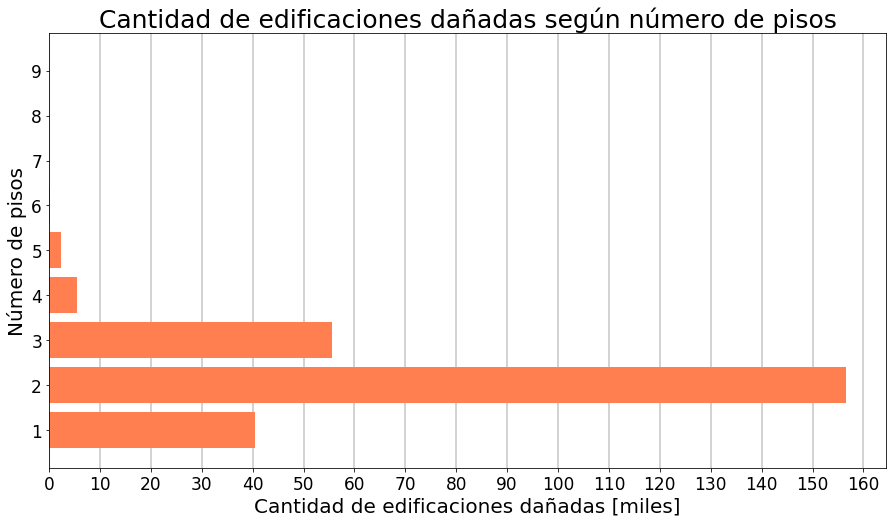

In [ ]:
fig,ax = plt.subplots(figsize=(15,8))
pisos = df\
  .groupby('count_floors_pre_eq').agg({'damage_grade':'count'}).reset_index()\
  .rename(columns={'damage_grade':'quantity'})['count_floors_pre_eq']
cantidad = df\
  .groupby('count_floors_pre_eq').agg({'damage_grade':'count'}).reset_index()\
  .rename(columns={'damage_grade':'quantity'})['quantity']

plot = ax.barh(y=pisos, width=cantidad, color='coral')

title='''Cantidad de edificaciones dañadas según número de pisos'''
plt.title(label=title, fontsize=25)
plt.xlabel('Cantidad de edificaciones dañadas [miles]', fontsize=20)
plt.ylabel('Número de pisos', fontsize=20)
plt.xticks(np.arange(0, 160001, step=10000), fontsize=17)
plt.yticks(np.arange(1, 10, step=1), fontsize=17)

# Función para elegir unidades de miles millón
def mil(x, pos):
  return '{:,.0f}'.format(x*1e-3)

plt.gca().xaxis.set_major_formatter(FuncFormatter(mil))
plt.grid(axis='x', linewidth=2, color='lightgray')
ax.set_axisbelow(True)

#plt.show()

# Mapas de calor: Cantidad de edificaciones con daños (low, medium, high) para los distintos geo_level_x_id

In [ ]:
# Se hace una copia al crear el nuevo DataFrame
columnas = ['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'damage_grade'] 
df_geo_levels_damage = df\
  .loc[:, columnas]\
  .set_index('damage_grade').copy()

In [ ]:
# Creación de Dataframe para bins por geo_level_x_id

df_geo_levels_damage = pd.DataFrame()

bins = np.arange(0, 31, step=2)
df_geo_levels_damage['geo_level_1_id_binned'] = pd.cut(df['geo_level_1_id'], bins)

bins = np.arange(0, 1441, step=96)
df_geo_levels_damage['geo_level_2_id_binned'] = pd.cut(df['geo_level_2_id'], bins)

bins = np.arange(0, 12571, step=838)
df_geo_levels_damage['geo_level_3_id_binned'] = pd.cut(df['geo_level_3_id'], bins)

df_geo_levels_damage['damage_grade'] = df['damage_grade']

In [ ]:
df_geo_levels_damage.head(3)

,geo_level_1_id_binned,geo_level_2_id_binned,geo_level_3_id_binned,damage_grade
0,"(4, 6]","(480, 576]","(11732, 12570]",3
1,"(6, 8]","(864, 960]","(2514, 3352]",2
2,"(20, 22]","(288, 384]","(8380, 9218]",3


Con este nuevo DataFrame se va a calcular las cantidades necesarias.

In [ ]:
df_geo_levels_damage['damage_grade'].value_counts()

2    148259
3     87218
1     25124
Name: damage_grade, dtype: int64

Según el registro de daños, por cantidad, primero se tienen edificaciones con daños medios, luego con daños graves y finalmente con daños leves.

## Cantidad de edificaciones con daños (low, medium, high) para `geo_level_1_id`

In [ ]:
# Cantidad de edificaciones dañadas para geo_level_id_1 contadas por nivel de daño
df_geo_damage_geo_1 = df_geo_levels_damage\
  .loc[df_geo_levels_damage['damage_grade'] == 1, 'geo_level_1_id_binned']\
  .value_counts().to_frame()\
  .reset_index()\
  .rename(columns={'index':'geo_level_1_id', 'geo_level_1_id_binned':'cant_low_dmg'})\
  .sort_values(by='geo_level_1_id', ascending=False)

df_aux = df_geo_levels_damage\
  .loc[df_geo_levels_damage['damage_grade'] == 2, 'geo_level_1_id_binned']\
  .value_counts().to_frame()\
  .reset_index()\
  .rename(columns={'index':'geo_level_1_id', 'geo_level_1_id_binned':'cant_med_dmg'})\
  .sort_values(by='geo_level_1_id', ascending=False)

df_geo_damage_geo_1 = df_geo_damage_geo_1.merge(df_aux, on='geo_level_1_id', how='outer')

df_aux = df_geo_levels_damage\
  .loc[df_geo_levels_damage['damage_grade'] == 3, 'geo_level_1_id_binned']\
  .value_counts().to_frame()\
  .reset_index()\
  .rename(columns={'index':'geo_level_1_id', 'geo_level_1_id_binned':'cant_hig_dmg'})\
  .sort_values(by='geo_level_1_id', ascending=False)

df_geo_damage_geo_1 = df_geo_damage_geo_1.merge(df_aux, on='geo_level_1_id', how='outer')
df_geo_damage_geo_1.set_index('geo_level_1_id', inplace=True)

In [ ]:
# Cantidad total de edificaciones de geo_level_1_id que registran algún daño 
df_geo_damage_geo_1.sum()

cant_low_dmg     24787
cant_med_dmg    145184
cant_hig_dmg     86619
dtype: int64

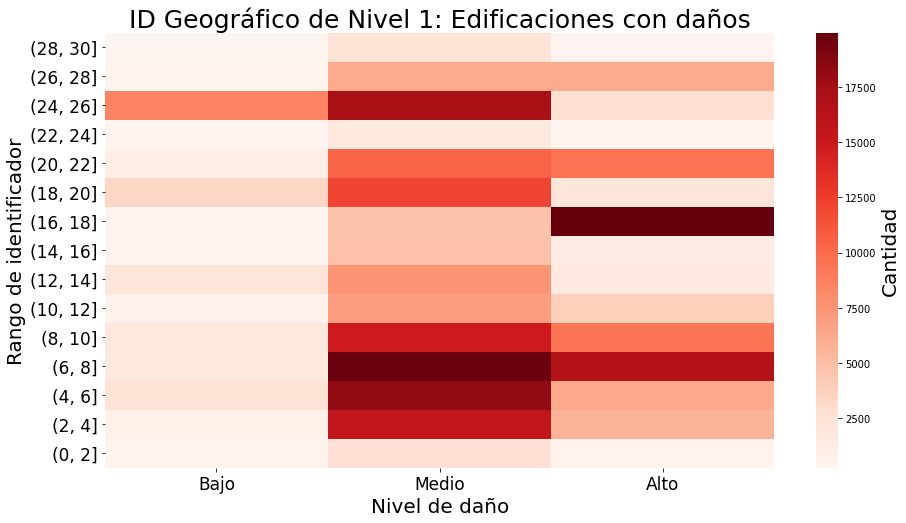

In [ ]:
plt.figure(figsize=(15,8))
plot = sns.heatmap(df_geo_damage_geo_1, cmap='Reds', \
                   cbar_kws={'label': 'Cantidad'}, \
                   xticklabels=['Bajo', 'Medio', 'Alto'])

title='''ID Geográfico de Nivel 1: Edificaciones con daños'''
plt.title(label=title, fontsize=25)
plt.xlabel('Nivel de daño', fontsize=20)
plt.ylabel('Rango de identificador', fontsize=20)
plt.yticks(fontsize=17)
plt.xticks(fontsize=17)
# Tamaño de fuente del rótulo de la barra de colores
plot.figure.axes[-1].yaxis.label.set_size(20)
plt.show()

### Notables

In [ ]:
df_geo_damage_geo_1['cant_low_dmg'].nlargest(1)

geo_level_1_id
(24, 26]    8496
Name: cant_low_dmg, dtype: int64

In [ ]:
df_geo_damage_geo_1['cant_med_dmg'].nlargest(5)

geo_level_1_id
(6, 8]      19786
(4, 6]      18236
(24, 26]    17029
(2, 4]      15714
(8, 10]     14840
Name: cant_med_dmg, dtype: int64

In [ ]:
df_geo_damage_geo_1['cant_hig_dmg'].nlargest(2)

geo_level_1_id
(16, 18]    19946
(6, 8]      16601
Name: cant_hig_dmg, dtype: int64

## Cantidad de edificaciones con daños (low, medium, high) para `geo_level_2_id`

In [ ]:
# Cantidad de edificaciones dañadas para geolevel_id_2 contadas por nivel de daño
df_geo_damage_geo_2 = df_geo_levels_damage\
  .loc[df_geo_levels_damage['damage_grade'] == 1, 'geo_level_2_id_binned']\
  .value_counts().to_frame()\
  .reset_index()\
  .rename(columns={'index':'geo_level_2_id', 'geo_level_2_id_binned':'cant_low_dmg'})\
  .sort_values(by='geo_level_2_id', ascending=False)

df_aux = df_geo_levels_damage\
  .loc[df_geo_levels_damage['damage_grade'] == 2, 'geo_level_2_id_binned']\
  .value_counts().to_frame()\
  .reset_index()\
  .rename(columns={'index':'geo_level_2_id', 'geo_level_2_id_binned':'cant_med_dmg'})\
  .sort_values(by='geo_level_2_id', ascending=False)

df_geo_damage_geo_2 = df_geo_damage_geo_2.merge(df_aux, on='geo_level_2_id', how='outer')

df_aux = df_geo_levels_damage\
  .loc[df_geo_levels_damage['damage_grade'] == 3, 'geo_level_2_id_binned']\
  .value_counts().to_frame()\
  .reset_index()\
  .rename(columns={'index':'geo_level_2_id', 'geo_level_2_id_binned':'cant_hig_dmg'})\
  .sort_values(by='geo_level_2_id', ascending=False)

df_geo_damage_geo_2 = df_geo_damage_geo_2.merge(df_aux, on='geo_level_2_id', how='outer')
df_geo_damage_geo_2.set_index('geo_level_2_id', inplace=True)

In [ ]:
# Cantidad total de edificaciones de geo_level_2_id que registran algún daño 
df_geo_damage_geo_2.sum()

cant_low_dmg     25124
cant_med_dmg    148250
cant_hig_dmg     87189
dtype: int64

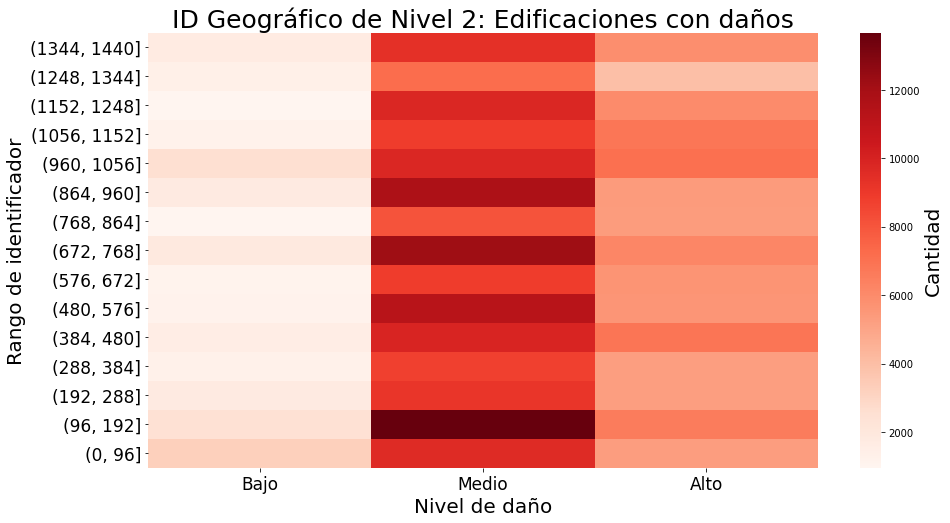

In [ ]:
plt.figure(figsize=(15,8))
plot = sns.heatmap(df_geo_damage_geo_2, cmap='Reds', \
                   cbar_kws={'label': 'Cantidad'}, \
                   xticklabels=['Bajo', 'Medio', 'Alto'])

title='''ID Geográfico de Nivel 2: Edificaciones con daños'''
plt.title(label=title, fontsize=25)
plt.xlabel('Nivel de daño', fontsize=20)
plt.ylabel('Rango de identificador', fontsize=20)
plt.yticks(fontsize=17)
plt.xticks(fontsize=17)
# Tamaño de fuente del rótulo de la barra de colores
plot.figure.axes[-1].yaxis.label.set_size(20)
plt.show()

In [ ]:
df_geo_damage_geo_2['cant_low_dmg'].nsmallest(3)

geo_level_2_id
(768, 864]       952
(1152, 1248]     965
(576, 672]      1123
Name: cant_low_dmg, dtype: int64

In [ ]:
df_geo_damage_geo_2.sum(axis=1).sort_values()

geo_level_2_id
(1248, 1344]    12502
(768, 864]      14381
(288, 384]      15263
(576, 672]      15598
(192, 288]      16186
(1152, 1248]    16755
(1056, 1152]    16935
(1344, 1440]    16969
(480, 576]      18045
(0, 96]         18209
(384, 480]      18386
(864, 960]      18866
(960, 1056]     19485
(672, 768]      20236
(96, 192]       22747
dtype: int64

## Cantidad de edificaciones con daños (low, medium, high) para `geo_level_3_id`

In [ ]:
# Cantidad de edificaciones dañadas para geolevel_id_3 contadas por nivel de daño
df_geo_damage_geo_3 = df_geo_levels_damage\
  .loc[df_geo_levels_damage['damage_grade'] == 1, 'geo_level_3_id_binned']\
  .value_counts().to_frame()\
  .reset_index()\
  .rename(columns={'index':'geo_level_3_id', 'geo_level_3_id_binned':'cant_low_dmg'})\
  .sort_values(by='geo_level_3_id', ascending=False)

df_aux = df_geo_levels_damage\
  .loc[df_geo_levels_damage['damage_grade'] == 2, 'geo_level_3_id_binned']\
  .value_counts().to_frame()\
  .reset_index()\
  .rename(columns={'index':'geo_level_3_id', 'geo_level_3_id_binned':'cant_med_dmg'})\
  .sort_values(by='geo_level_3_id', ascending=False)

df_geo_damage_geo_3 = df_geo_damage_geo_3.merge(df_aux, on='geo_level_3_id', how='outer')

df_aux = df_geo_levels_damage\
  .loc[df_geo_levels_damage['damage_grade'] == 3, 'geo_level_3_id_binned']\
  .value_counts().to_frame()\
  .reset_index()\
  .rename(columns={'index':'geo_level_3_id', 'geo_level_3_id_binned':'cant_hig_dmg'})\
  .sort_values(by='geo_level_3_id', ascending=False)

df_geo_damage_geo_3 = df_geo_damage_geo_3.merge(df_aux, on='geo_level_3_id', how='outer')
df_geo_damage_geo_3.set_index('geo_level_3_id', inplace=True)

In [ ]:
# Cantidad total de edificaciones de geo_level_3_id que registran algún daño 
df_geo_damage_geo_3.sum()

cant_low_dmg     25124
cant_med_dmg    148259
cant_hig_dmg     87216
dtype: int64

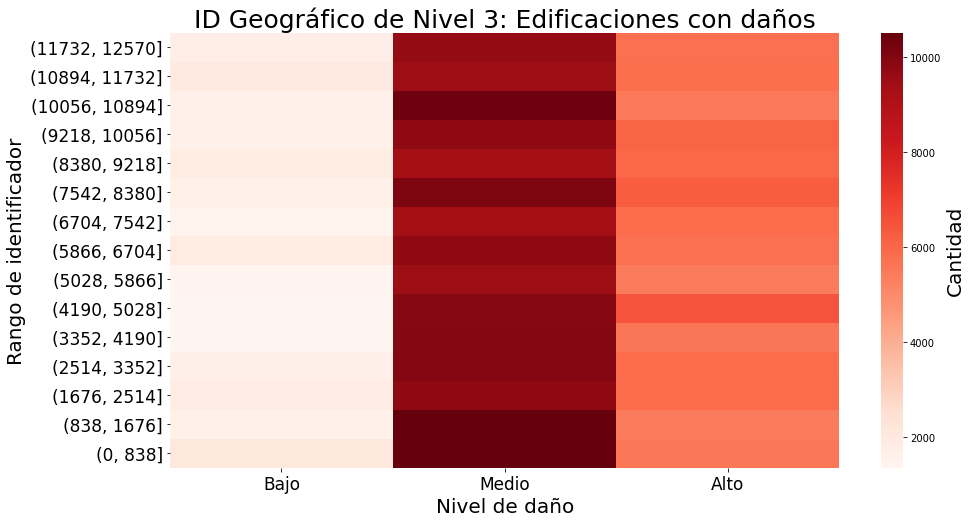

In [ ]:
plt.figure(figsize=(15,8))
plot = sns.heatmap(df_geo_damage_geo_3, cmap='Reds', \
                   cbar_kws={'label': 'Cantidad'}, \
                   xticklabels=['Bajo', 'Medio', 'Alto'])

title='''ID Geográfico de Nivel 3: Edificaciones con daños'''
plt.title(label=title, fontsize=25)
plt.xlabel('Nivel de daño', fontsize=20)
plt.ylabel('Rango de identificador', fontsize=20)
plt.yticks(fontsize=17)
plt.xticks(fontsize=17)
# Tamaño de fuente del rótulo de la barra de colores
plot.figure.axes[-1].yaxis.label.set_size(20)
plt.show()

In [ ]:
df_geo_damage_geo_3['cant_med_dmg'].nlargest(5)

geo_level_3_id
(0, 838]          10518
(838, 1676]       10499
(10056, 10894]    10392
(7542, 8380]      10118
(2514, 3352]       9983
Name: cant_med_dmg, dtype: int64

Ya que la distribución de casos parece tener cierta uniformidad tiene sentido analizar algunos estadísticos.

In [ ]:
i=1
for col in df_geo_damage_geo_3.columns:
  print('Nivel Geográfico', i, ':')
  print('\tcant\t', df_geo_damage_geo_3[col].sum())
  print('\tmedia\t', np.round(df_geo_damage_geo_3[col].mean(), 0))
  print('\tmediana\t', df_geo_damage_geo_3[col].median())
  print('\tdesvío\t', np.round(df_geo_damage_geo_3[col].std(), 0))
  i = i+1

Nivel Geográfico 1 :
	cant	 25124
	media	 1675.0
	mediana	 1665.0
	desvío	 220.0
Nivel Geográfico 2 :
	cant	 148259
	media	 9884.0
	mediana	 9799.0
	desvío	 371.0
Nivel Geográfico 3 :
	cant	 87216
	media	 5814.0
	mediana	 5802.0
	desvío	 301.0


### Conclusión

En las tres regiones geográficas se ve que la ocurrencia de poco daño es mínima comparada con los otros tipos de daño. Las edificaciones con daño medio dominan en todas las regiones, especialmente en la región geográfica de nivel 3.

# Daños por condición de superficie

## Dataframe de datos pertinentes

In [ ]:
df_dmg_by_surf_cond = df\
  .loc[df['damage_grade'] == 1, 'land_surface_condition']\
  .value_counts().to_frame().reset_index()\
  .rename(columns={'index':'surf_cond', \
                   'land_surface_condition':'cant_low_dmg'})

df_dmg_by_surf_cond

,surf_cond,cant_low_dmg
0,t,21966
1,n,2556
2,o,602


In [ ]:
df_dmg_by_surf_cond = df_dmg_by_surf_cond\
  .merge(df\
         .loc[df['damage_grade'] == 2, 'land_surface_condition']\
         .value_counts().to_frame().reset_index()\
         .rename(columns={'index':'surf_cond', \
                          'land_surface_condition':'cant_med_dmg'}), \
         on = 'surf_cond', how='left')
  
df_dmg_by_surf_cond

,surf_cond,cant_low_dmg,cant_med_dmg
0,t,21966,122067
1,n,2556,21484
2,o,602,4708


In [ ]:
df_dmg_by_surf_cond = df_dmg_by_surf_cond\
  .merge(df\
         .loc[df['damage_grade'] == 3, 'land_surface_condition']\
         .value_counts().to_frame().reset_index()\
         .rename(columns={'index':'surf_cond', \
                          'land_surface_condition':'cant_hig_dmg'}), \
         on = 'surf_cond', how='left')
  
df_dmg_by_surf_cond

,surf_cond,cant_low_dmg,cant_med_dmg,cant_hig_dmg
0,t,21966,122067,72724
1,n,2556,21484,11488
2,o,602,4708,3006


## Se añaden proporciones

In [ ]:
# Suma de casos
df_dmg_by_surf_cond['total'] = df_dmg_by_surf_cond[['cant_low_dmg', 'cant_med_dmg', 'cant_hig_dmg']].sum(axis=1)
# Cálculo de proporciones, en %
df_dmg_by_surf_cond['p_low'] = np.round(df_dmg_by_surf_cond['cant_low_dmg']/df_dmg_by_surf_cond['total']*100, 1)
df_dmg_by_surf_cond['p_med'] = np.round(df_dmg_by_surf_cond['cant_med_dmg']/df_dmg_by_surf_cond['total']*100, 1)
df_dmg_by_surf_cond['p_hig'] = np.round(df_dmg_by_surf_cond['cant_hig_dmg']/df_dmg_by_surf_cond['total']*100, 1)

df_dmg_by_surf_cond

## Plot

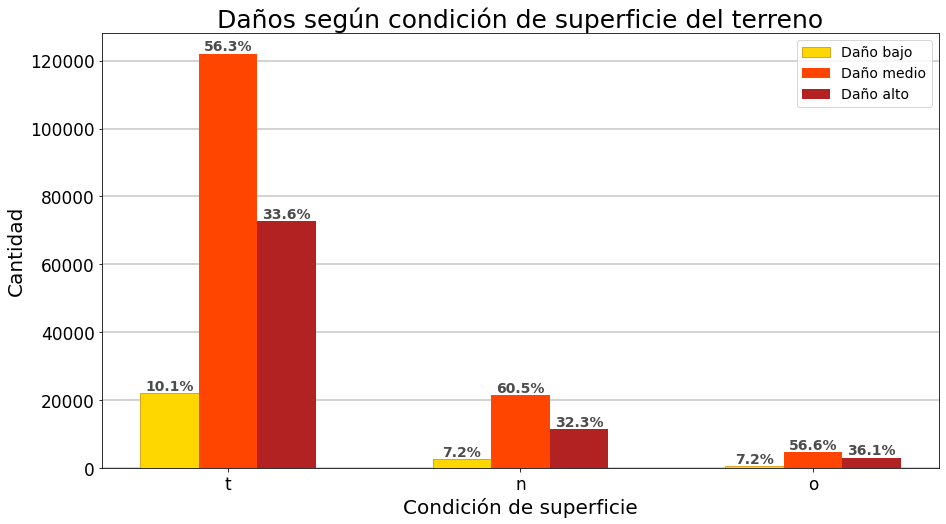

In [ ]:
fig,ax = plt.subplots(figsize=(15,8))
labels = df_dmg_by_surf_cond['surf_cond']
x = np.arange(len(labels))
width = 0.2

bar1 = ax.bar(x - width, df_dmg_by_surf_cond['cant_low_dmg'], width,\
              label='Daño bajo', color='gold', edgecolor='goldenrod')
bar2 = ax.bar(x , df_dmg_by_surf_cond['cant_med_dmg'], width,\
              label='Daño medio', color='orangered')
bar3 = ax.bar(x + width, df_dmg_by_surf_cond['cant_hig_dmg'], width,\
              label='Daño alto', color='firebrick')

ax.set_title('Daños según condición de superficie del terreno', fontsize=25)
ax.set_ylabel('Cantidad', fontsize=20)
ax.set_xlabel('Condición de superficie', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.legend(fontsize=14)

plt.grid(axis='y', linewidth=2, color='lightgray')
ax.set_axisbelow(True)

# Proporciones
# bar_label es nuevo hay que actualizar matplotlib
ax.bar_label(bar1, labels=df_dmg_by_surf_cond['p_low'].astype('str')+'%', \
             label_type='edge', color='black', fontsize=14, \
             fontweight='bold', rotation=0, alpha=0.7)
ax.bar_label(bar2, labels=df_dmg_by_surf_cond['p_med'].astype('str')+'%', \
             label_type='edge', color='black', fontsize=14, \
             fontweight='bold', rotation=0, alpha=0.7)
ax.bar_label(bar3, labels=df_dmg_by_surf_cond['p_hig'].astype('str')+'%', \
             label_type='edge', color='black', fontsize=14, \
             fontweight='bold', rotation=0, alpha=0.7)

plt.show()

# Daños por tipo de cimientos

## Dataframe de datos pertinentes

In [ ]:
df_dmg_by_foun_type = df\
  .loc[df['damage_grade'] == 1, 'foundation_type']\
  .value_counts().to_frame().reset_index()\
  .rename(columns={'index':'foun_type', \
                   'foundation_type':'cant_low_dmg'})

df_dmg_by_foun_type

,foun_type,cant_low_dmg
0,r,10720
1,i,6004
2,w,4353
3,u,3689
4,h,358


In [ ]:
df_dmg_by_foun_type = df_dmg_by_foun_type\
  .merge(df\
         .loc[df['damage_grade'] == 2, 'foundation_type']\
         .value_counts().to_frame().reset_index()\
         .rename(columns={'index':'foun_type', \
                          'foundation_type':'cant_med_dmg'}), \
         on = 'foun_type', how='left')
  
df_dmg_by_foun_type

,foun_type,cant_low_dmg,cant_med_dmg
0,r,10720,125515
1,i,6004,4354
2,w,4353,9270
3,u,3689,8541
4,h,358,579


In [ ]:
df_dmg_by_foun_type = df_dmg_by_foun_type\
  .merge(df\
         .loc[df['damage_grade'] == 3, 'foundation_type']\
         .value_counts().to_frame().reset_index()\
         .rename(columns={'index':'foun_type', \
                          'foundation_type':'cant_hig_dmg'}), \
         on = 'foun_type', how='left')
  
df_dmg_by_foun_type

,foun_type,cant_low_dmg,cant_med_dmg,cant_hig_dmg
0,r,10720,125515,82961
1,i,6004,4354,221
2,w,4353,9270,1495
3,u,3689,8541,2030
4,h,358,579,511


## Se añaden proporciones

In [ ]:
# Suma de casos
df_dmg_by_foun_type['total'] = df_dmg_by_foun_type[['cant_low_dmg', 'cant_med_dmg', 'cant_hig_dmg']].sum(axis=1)
# Cálculo de proporciones, en %
df_dmg_by_foun_type['p_low'] = np.round(df_dmg_by_foun_type['cant_low_dmg']/df_dmg_by_foun_type['total']*100, 1)
df_dmg_by_foun_type['p_med'] = np.round(df_dmg_by_foun_type['cant_med_dmg']/df_dmg_by_foun_type['total']*100, 1)
df_dmg_by_foun_type['p_hig'] = np.round(df_dmg_by_foun_type['cant_hig_dmg']/df_dmg_by_foun_type['total']*100, 1)

df_dmg_by_foun_type

,foun_type,cant_low_dmg,cant_med_dmg,cant_hig_dmg,total,p_low,p_med,p_hig
0,r,10720,125515,82961,219196,4.9,57.3,37.8
1,i,6004,4354,221,10579,56.8,41.2,2.1
2,w,4353,9270,1495,15118,28.8,61.3,9.9
3,u,3689,8541,2030,14260,25.9,59.9,14.2
4,h,358,579,511,1448,24.7,40.0,35.3


## Cimientos tipo `r`

In [ ]:
df_dmg_by_foun_type_a = df_dmg_by_foun_type.drop([1, 2, 3, 4])
df_dmg_by_foun_type_a

,foun_type,cant_low_dmg,cant_med_dmg,cant_hig_dmg,total,p_low,p_med,p_hig
0,r,10720,125515,82961,219196,4.9,57.3,37.8


## Plot a

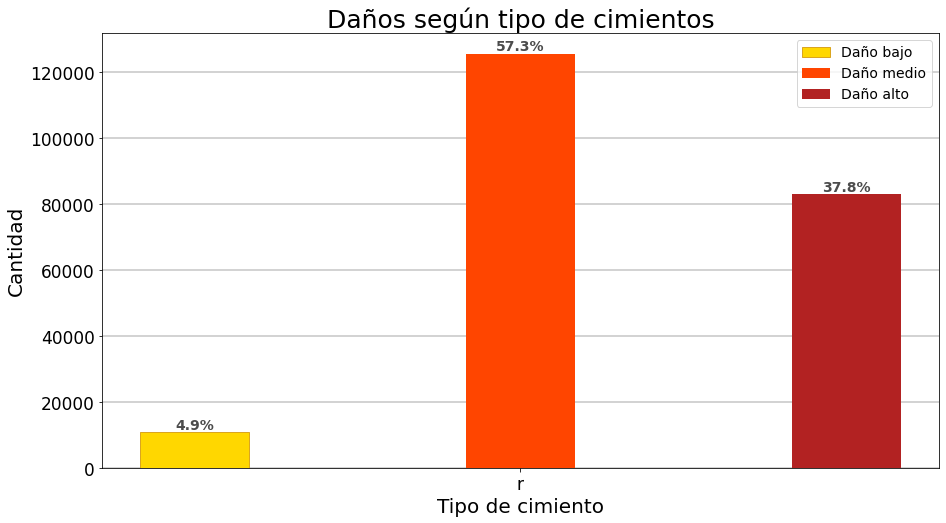

In [ ]:
fig,ax = plt.subplots(figsize=(15,8))
labels = df_dmg_by_foun_type_a['foun_type']
x = np.arange(len(labels))
width = 0.1

bar1 = ax.bar(x - 3*width, df_dmg_by_foun_type_a['cant_low_dmg'], width,\
              label='Daño bajo', color='gold', edgecolor='goldenrod')
bar2 = ax.bar(x , df_dmg_by_foun_type_a['cant_med_dmg'], width,\
              label='Daño medio', color='orangered')
bar3 = ax.bar(x + 3*width, df_dmg_by_foun_type_a['cant_hig_dmg'], width,\
              label='Daño alto', color='firebrick')

ax.set_title('Daños según tipo de cimientos', fontsize=25)
ax.set_ylabel('Cantidad', fontsize=20)
ax.set_xlabel('Tipo de cimiento', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.legend(fontsize=14)

plt.grid(axis='y', linewidth=2, color='lightgray')
ax.set_axisbelow(True)

# Proporciones
ax.bar_label(bar1, labels=df_dmg_by_foun_type_a['p_low'].astype('str')+'%', \
             label_type='edge', color='black', fontsize=14, \
             fontweight='bold', rotation=0, alpha=0.7)
ax.bar_label(bar2, labels=df_dmg_by_foun_type_a['p_med'].astype('str')+'%', \
             label_type='edge', color='black', fontsize=14, \
             fontweight='bold', rotation=0, alpha=0.7)
ax.bar_label(bar3, labels=df_dmg_by_foun_type_a['p_hig'].astype('str')+'%', \
             label_type='edge', color='black', fontsize=14, \
             fontweight='bold', rotation=0, alpha=0.7)

plt.show()

## Dataframe sin cimiento `r`

In [ ]:
df_dmg_by_foun_type_b = df_dmg_by_foun_type.drop(0)
df_dmg_by_foun_type_b

,foun_type,cant_low_dmg,cant_med_dmg,cant_hig_dmg,total,p_low,p_med,p_hig
1,i,6004,4354,221,10579,56.8,41.2,2.1
2,w,4353,9270,1495,15118,28.8,61.3,9.9
3,u,3689,8541,2030,14260,25.9,59.9,14.2
4,h,358,579,511,1448,24.7,40.0,35.3


## Plot b

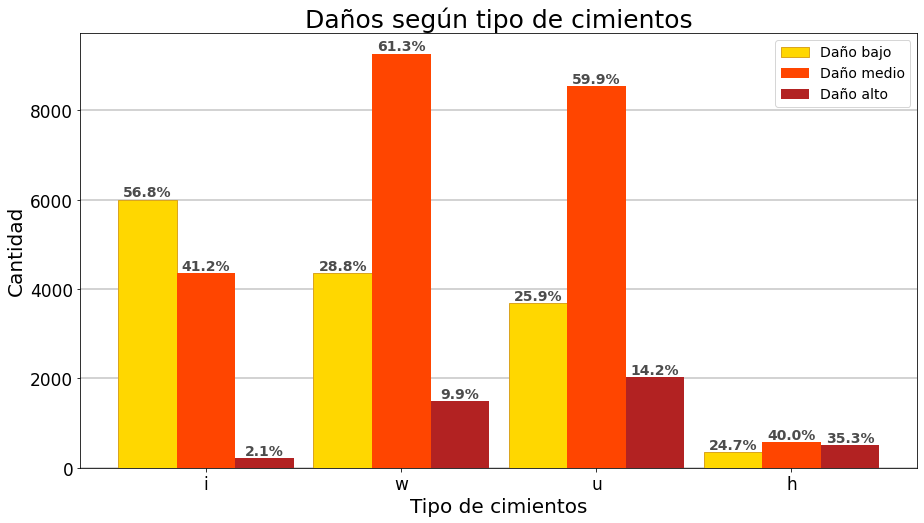

In [ ]:
fig,ax = plt.subplots(figsize=(15,8))
labels = df_dmg_by_foun_type_b['foun_type']
x = np.arange(len(labels))
width = 0.3

bar1 = ax.bar(x - width, df_dmg_by_foun_type_b['cant_low_dmg'], width,\
              label='Daño bajo', color='gold', edgecolor='goldenrod')
bar2 = ax.bar(x , df_dmg_by_foun_type_b['cant_med_dmg'], width,\
              label='Daño medio', color='orangered')
bar3 = ax.bar(x + width, df_dmg_by_foun_type_b['cant_hig_dmg'], width,\
              label='Daño alto', color='firebrick')

ax.set_title('Daños según tipo de cimientos', fontsize=25)
ax.set_ylabel('Cantidad', fontsize=20)
ax.set_xlabel('Tipo de cimientos', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.legend(fontsize=14)

plt.grid(axis='y', linewidth=2, color='lightgray')
ax.set_axisbelow(True)

# Proporciones
ax.bar_label(bar1, labels=df_dmg_by_foun_type_b['p_low'].astype('str')+'%', \
             label_type='edge', color='black', fontsize=14, \
             fontweight='bold', rotation=0, alpha=0.7)
ax.bar_label(bar2, labels=df_dmg_by_foun_type_b['p_med'].astype('str')+'%', \
             label_type='edge', color='black', fontsize=14, \
             fontweight='bold', rotation=0, alpha=0.7)
ax.bar_label(bar3, labels=df_dmg_by_foun_type_b['p_hig'].astype('str')+'%', \
             label_type='edge', color='black', fontsize=14, \
             fontweight='bold', rotation=0, alpha=0.7)

plt.show()

# Daños según tipo de techo

## Dataframe de datos pertinentes

In [ ]:
df_dmg_by_roof_type = df\
  .loc[df['damage_grade'] == 1, 'roof_type']\
  .value_counts().to_frame().reset_index()\
  .rename(columns={'index':'roof_type', \
                   'roof_type':'cant_low_dmg'})

df_dmg_by_roof_type

,roof_type,cant_low_dmg
0,n,13547
1,x,7651
2,q,3926


In [ ]:
df_dmg_by_roof_type = df_dmg_by_roof_type\
  .merge(df\
         .loc[df['damage_grade'] == 2, 'roof_type']\
         .value_counts().to_frame().reset_index()\
         .rename(columns={'index':'roof_type', \
                          'roof_type':'cant_med_dmg'}), \
         on = 'roof_type', how='left')
  
df_dmg_by_roof_type

,roof_type,cant_low_dmg,cant_med_dmg
0,n,13547,106447
1,x,7651,7803
2,q,3926,34009


In [ ]:
df_dmg_by_roof_type = df_dmg_by_roof_type\
  .merge(df\
         .loc[df['damage_grade'] == 3, 'roof_type']\
         .value_counts().to_frame().reset_index()\
         .rename(columns={'index':'roof_type', \
                          'roof_type':'cant_hig_dmg'}), \
         on = 'roof_type', how='left')
  
df_dmg_by_roof_type

,roof_type,cant_low_dmg,cant_med_dmg,cant_hig_dmg
0,n,13547,106447,62848
1,x,7651,7803,729
2,q,3926,34009,23641


## Se añaden proporciones

In [ ]:
# Suma de casos
df_dmg_by_roof_type['total'] = df_dmg_by_roof_type[['cant_low_dmg', 'cant_med_dmg', 'cant_hig_dmg']].sum(axis=1)
# Cálculo de proporciones, en %
df_dmg_by_roof_type['p_low'] = np.round(df_dmg_by_roof_type['cant_low_dmg']/df_dmg_by_roof_type['total']*100, 1)
df_dmg_by_roof_type['p_med'] = np.round(df_dmg_by_roof_type['cant_med_dmg']/df_dmg_by_roof_type['total']*100, 1)
df_dmg_by_roof_type['p_hig'] = np.round(df_dmg_by_roof_type['cant_hig_dmg']/df_dmg_by_roof_type['total']*100, 1)

df_dmg_by_roof_type

,roof_type,cant_low_dmg,cant_med_dmg,cant_hig_dmg,total,p_low,p_med,p_hig
0,n,13547,106447,62848,182842,7.4,58.2,34.4
1,x,7651,7803,729,16183,47.3,48.2,4.5
2,q,3926,34009,23641,61576,6.4,55.2,38.4


## Plot

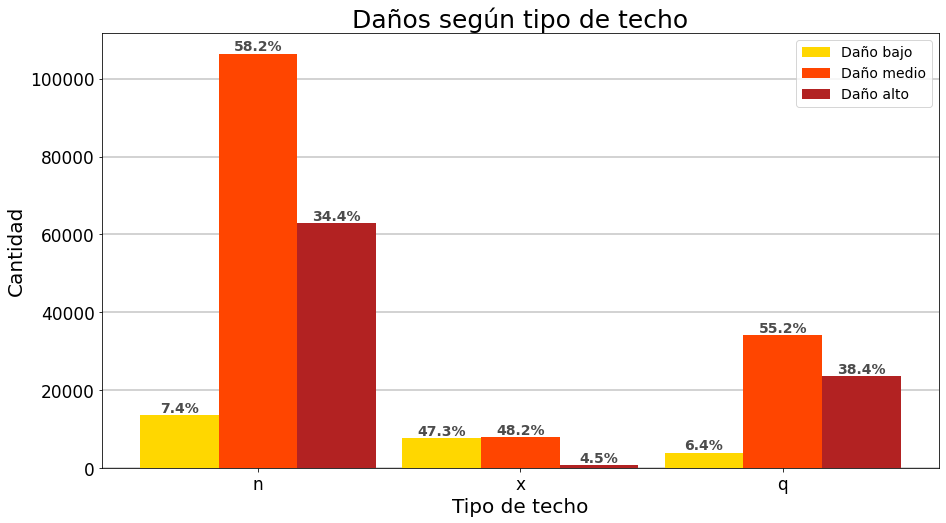

In [ ]:
fig,ax = plt.subplots(figsize=(15,8))
labels = df_dmg_by_roof_type['roof_type']
x = np.arange(len(labels))
width = 0.3

bar1 = ax.bar(x - width, df_dmg_by_roof_type['cant_low_dmg'], width,\
              label='Daño bajo', color='gold')
bar2 = ax.bar(x , df_dmg_by_roof_type['cant_med_dmg'], width,\
              label='Daño medio', color='orangered')
bar3 = ax.bar(x + width, df_dmg_by_roof_type['cant_hig_dmg'], width,\
              label='Daño alto', color='firebrick')

ax.set_title('Daños según tipo de techo', fontsize=25)
ax.set_ylabel('Cantidad', fontsize=20)
ax.set_xlabel('Tipo de techo', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.legend(fontsize=14)

plt.grid(axis='y', linewidth=2, color='lightgray')
ax.set_axisbelow(True)

# Proporciones
ax.bar_label(bar1, labels=df_dmg_by_roof_type['p_low'].astype('str')+'%', \
             label_type='edge', color='black', fontsize=14, \
             fontweight='bold', rotation=0, alpha=0.7)
ax.bar_label(bar2, labels=df_dmg_by_roof_type['p_med'].astype('str')+'%', \
             label_type='edge', color='black', fontsize=14, \
             fontweight='bold', rotation=0, alpha=0.7)
ax.bar_label(bar3, labels=df_dmg_by_roof_type['p_hig'].astype('str')+'%', \
             label_type='edge', color='black', fontsize=14, \
             fontweight='bold', rotation=0, alpha=0.7)

plt.show()

# Daños según piso en la planta baja

## Dataframe de datos pertinentes

In [ ]:
df_dmg_by_grnd_floo = df\
  .loc[df['damage_grade'] == 1, 'ground_floor_type']\
  .value_counts().to_frame().reset_index()\
  .rename(columns={'index':'ground_floor_type', \
                   'ground_floor_type':'cant_low_dmg'})

df_dmg_by_grnd_floo

,ground_floor_type,cant_low_dmg
0,f,12474
1,v,10309
2,x,2052
3,z,199
4,m,90


In [ ]:
df_dmg_by_grnd_floo = df_dmg_by_grnd_floo\
  .merge(df\
         .loc[df['damage_grade'] == 2, 'ground_floor_type']\
         .value_counts().to_frame().reset_index()\
         .rename(columns={'index':'ground_floor_type', \
                          'ground_floor_type':'cant_med_dmg'}), \
         on = 'ground_floor_type', how='left')
  
df_dmg_by_grnd_floo

,ground_floor_type,cant_low_dmg,cant_med_dmg
0,f,12474,119877
1,v,10309,12971
2,x,2052,14536
3,z,199,532
4,m,90,343


In [ ]:
df_dmg_by_grnd_floo = df_dmg_by_grnd_floo\
  .merge(df\
         .loc[df['damage_grade'] == 3, 'ground_floor_type']\
         .value_counts().to_frame().reset_index()\
         .rename(columns={'index':'ground_floor_type', \
                          'ground_floor_type':'cant_hig_dmg'}), \
         on = 'ground_floor_type', how='left')
  
df_dmg_by_grnd_floo

,ground_floor_type,cant_low_dmg,cant_med_dmg,cant_hig_dmg
0,f,12474,119877,77268
1,v,10309,12971,1313
2,x,2052,14536,8289
3,z,199,532,273
4,m,90,343,75


## Se añaden proporciones

In [ ]:
# Suma de casos
df_dmg_by_grnd_floo['total'] = df_dmg_by_grnd_floo[['cant_low_dmg', 'cant_med_dmg', 'cant_hig_dmg']].sum(axis=1)
# Cálculo de proporciones, en %
df_dmg_by_grnd_floo['p_low'] = np.round(df_dmg_by_grnd_floo['cant_low_dmg']/df_dmg_by_grnd_floo['total']*100, 1)
df_dmg_by_grnd_floo['p_med'] = np.round(df_dmg_by_grnd_floo['cant_med_dmg']/df_dmg_by_grnd_floo['total']*100, 1)
df_dmg_by_grnd_floo['p_hig'] = np.round(df_dmg_by_grnd_floo['cant_hig_dmg']/df_dmg_by_grnd_floo['total']*100, 1)

df_dmg_by_grnd_floo

,ground_floor_type,cant_low_dmg,cant_med_dmg,cant_hig_dmg,total,p_low,p_med,p_hig
0,f,12474,119877,77268,209619,6.0,57.2,36.9
1,v,10309,12971,1313,24593,41.9,52.7,5.3
2,x,2052,14536,8289,24877,8.2,58.4,33.3
3,z,199,532,273,1004,19.8,53.0,27.2
4,m,90,343,75,508,17.7,67.5,14.8


## Tipo de pisos `f, v, x` en planta baja

In [ ]:
df_dmg_by_grnd_floo_a = df_dmg_by_grnd_floo.drop([3, 4])
df_dmg_by_grnd_floo_a

,ground_floor_type,cant_low_dmg,cant_med_dmg,cant_hig_dmg,total,p_low,p_med,p_hig
0,f,12474,119877,77268,209619,6.0,57.2,36.9
1,v,10309,12971,1313,24593,41.9,52.7,5.3
2,x,2052,14536,8289,24877,8.2,58.4,33.3


## Plot a

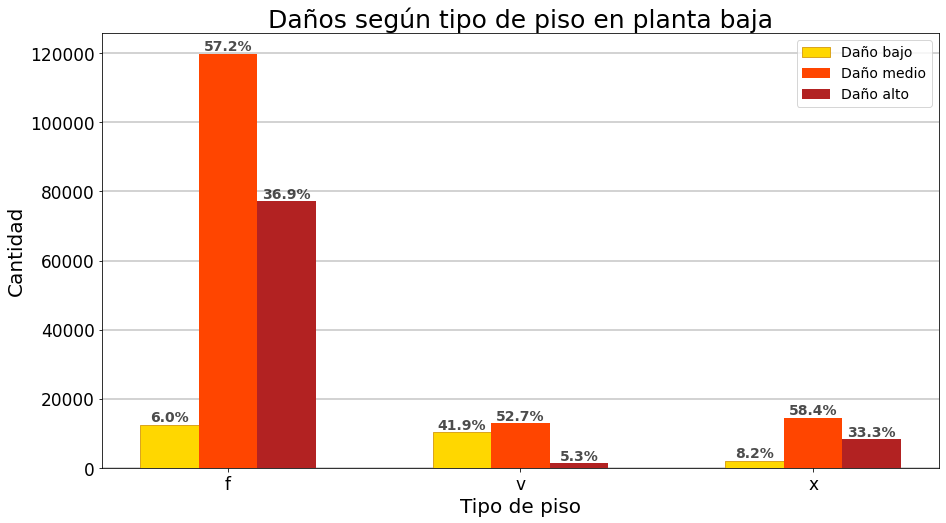

In [ ]:
fig,ax = plt.subplots(figsize=(15,8))
labels = df_dmg_by_grnd_floo_a['ground_floor_type']
x = np.arange(len(labels))
width = 0.2

bar1 = ax.bar(x - width, df_dmg_by_grnd_floo_a['cant_low_dmg'], width,\
              label='Daño bajo', color='gold', edgecolor='goldenrod')
bar2 = ax.bar(x , df_dmg_by_grnd_floo_a['cant_med_dmg'], width,\
              label='Daño medio', color='orangered')
bar3 = ax.bar(x + width, df_dmg_by_grnd_floo_a['cant_hig_dmg'], width,\
              label='Daño alto', color='firebrick')

ax.set_title('Daños según tipo de piso en planta baja', fontsize=25)
ax.set_ylabel('Cantidad', fontsize=20)
ax.set_xlabel('Tipo de piso', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.legend(fontsize=14)

plt.grid(axis='y', linewidth=2, color='lightgray')
ax.set_axisbelow(True)

# Proporciones
ax.bar_label(bar1, labels=df_dmg_by_grnd_floo_a['p_low'].astype('str')+'%', \
             label_type='edge', color='black', fontsize=14, \
             fontweight='bold', rotation=0, alpha=0.7)
ax.bar_label(bar2, labels=df_dmg_by_grnd_floo_a['p_med'].astype('str')+'%', \
             label_type='edge', color='black', fontsize=14, \
             fontweight='bold', rotation=0, alpha=0.7)
ax.bar_label(bar3, labels=df_dmg_by_grnd_floo_a['p_hig'].astype('str')+'%', \
             label_type='edge', color='black', fontsize=14, \
             fontweight='bold', rotation=0, alpha=0.7)

plt.show()

## Tipo de pisos `z, m` en planta baja


In [ ]:
df_dmg_by_grnd_floo_b = df_dmg_by_grnd_floo.drop([0, 1, 2])
df_dmg_by_grnd_floo_b

,ground_floor_type,cant_low_dmg,cant_med_dmg,cant_hig_dmg,total,p_low,p_med,p_hig
3,z,199,532,273,1004,19.8,53.0,27.2
4,m,90,343,75,508,17.7,67.5,14.8


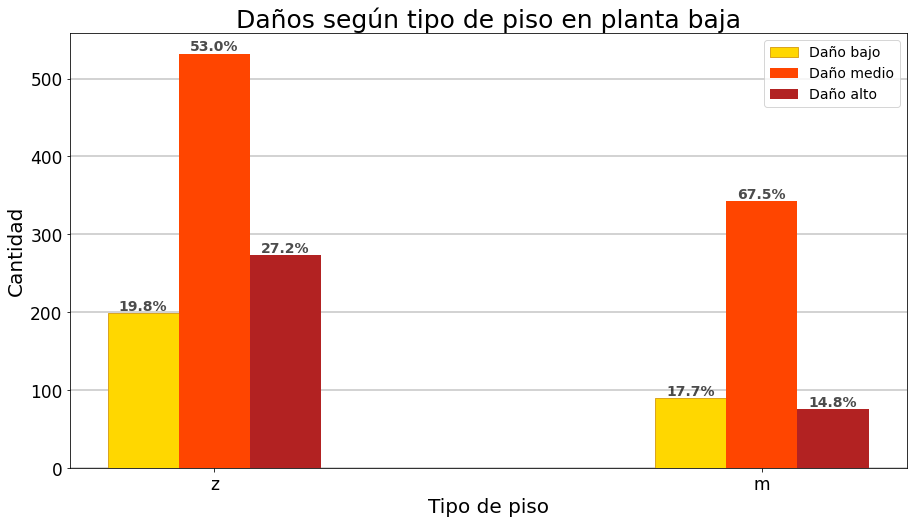

In [ ]:
fig,ax = plt.subplots(figsize=(15,8))
labels = df_dmg_by_grnd_floo_b['ground_floor_type']
x = np.arange(len(labels))
width = 0.13

bar1 = ax.bar(x - width, df_dmg_by_grnd_floo_b['cant_low_dmg'], width,\
              label='Daño bajo', color='gold', edgecolor='goldenrod')
bar2 = ax.bar(x , df_dmg_by_grnd_floo_b['cant_med_dmg'], width,\
              label='Daño medio', color='orangered')
bar3 = ax.bar(x + width, df_dmg_by_grnd_floo_b['cant_hig_dmg'], width,\
              label='Daño alto', color='firebrick')

ax.set_title('Daños según tipo de piso en planta baja', fontsize=25)
ax.set_ylabel('Cantidad', fontsize=20)
ax.set_xlabel('Tipo de piso', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.legend(fontsize=14)

plt.grid(axis='y', linewidth=2, color='lightgray')
ax.set_axisbelow(True)

# Proporciones
ax.bar_label(bar1, labels=df_dmg_by_grnd_floo_b['p_low'].astype('str')+'%', \
             label_type='edge', color='black', fontsize=14, \
             fontweight='bold', rotation=0, alpha=0.7)
ax.bar_label(bar2, labels=df_dmg_by_grnd_floo_b['p_med'].astype('str')+'%', \
             label_type='edge', color='black', fontsize=14, \
             fontweight='bold', rotation=0, alpha=0.7)
ax.bar_label(bar3, labels=df_dmg_by_grnd_floo_b['p_hig'].astype('str')+'%', \
             label_type='edge', color='black', fontsize=14, \
             fontweight='bold', rotation=0, alpha=0.7)

plt.show()

# Daños según construcción de pisos superiores

## Dataframe de datos pertinentes

In [ ]:
df_dmg_by_othe_floo = df\
  .loc[df['damage_grade'] == 1, 'other_floor_type']\
  .value_counts().to_frame().reset_index()\
  .rename(columns={'index':'other_floor_type', \
                   'other_floor_type':'cant_low_dmg'})

df_dmg_by_othe_floo

,other_floor_type,cant_low_dmg
0,j,8886
1,q,7387
2,s,5423
3,x,3428


In [ ]:
df_dmg_by_othe_floo = df_dmg_by_othe_floo\
  .merge(df\
         .loc[df['damage_grade'] == 2, 'other_floor_type']\
         .value_counts().to_frame().reset_index()\
         .rename(columns={'index':'other_floor_type', \
                          'other_floor_type':'cant_med_dmg'}), \
         on = 'other_floor_type', how='left')
  
df_dmg_by_othe_floo

,other_floor_type,cant_low_dmg,cant_med_dmg
0,j,8886,20362
1,q,7387,98320
2,s,5423,5904
3,x,3428,23673


In [ ]:
df_dmg_by_othe_floo = df_dmg_by_othe_floo\
  .merge(df\
         .loc[df['damage_grade'] == 3, 'other_floor_type']\
         .value_counts().to_frame().reset_index()\
         .rename(columns={'index':'other_floor_type', \
                          'other_floor_type':'cant_hig_dmg'}), \
         on = 'other_floor_type', how='left')
  
df_dmg_by_othe_floo

,other_floor_type,cant_low_dmg,cant_med_dmg,cant_hig_dmg
0,j,8886,20362,10595
1,q,7387,98320,59575
2,s,5423,5904,701
3,x,3428,23673,16347


## Se añaden proporciones

In [ ]:
# Suma de casos
df_dmg_by_othe_floo['total'] = df_dmg_by_othe_floo[['cant_low_dmg', 'cant_med_dmg', 'cant_hig_dmg']].sum(axis=1)
# Cálculo de proporciones, en %
df_dmg_by_othe_floo['p_low'] = np.round(df_dmg_by_othe_floo['cant_low_dmg']/df_dmg_by_othe_floo['total']*100, 1)
df_dmg_by_othe_floo['p_med'] = np.round(df_dmg_by_othe_floo['cant_med_dmg']/df_dmg_by_othe_floo['total']*100, 1)
df_dmg_by_othe_floo['p_hig'] = np.round(df_dmg_by_othe_floo['cant_hig_dmg']/df_dmg_by_othe_floo['total']*100, 1)

df_dmg_by_othe_floo

,other_floor_type,cant_low_dmg,cant_med_dmg,cant_hig_dmg,total,p_low,p_med,p_hig
0,j,8886,20362,10595,39843,22.3,51.1,26.6
1,q,7387,98320,59575,165282,4.5,59.5,36.0
2,s,5423,5904,701,12028,45.1,49.1,5.8
3,x,3428,23673,16347,43448,7.9,54.5,37.6


## Plot

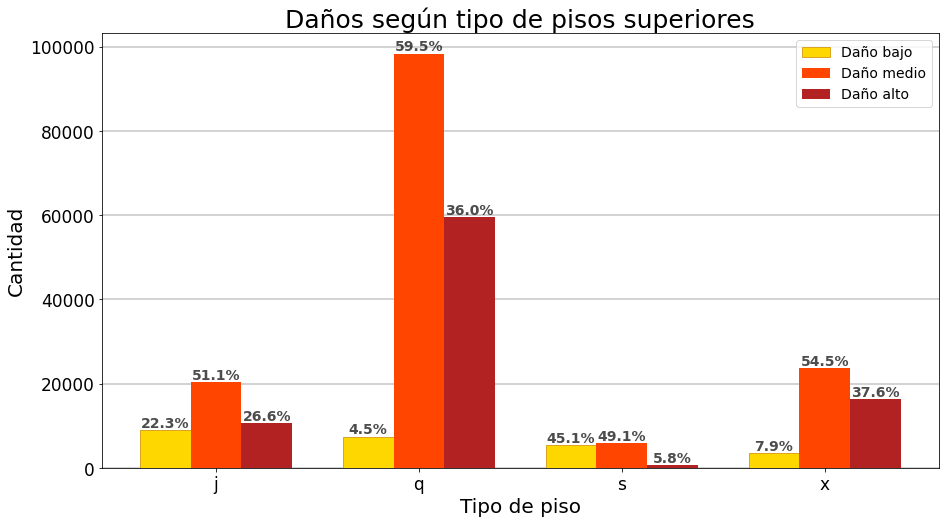

In [ ]:
fig,ax = plt.subplots(figsize=(15,8))
labels = df_dmg_by_othe_floo['other_floor_type']
x = np.arange(len(labels))
width = 0.25

bar1 = ax.bar(x - width, df_dmg_by_othe_floo['cant_low_dmg'], width,\
              label='Daño bajo', color='gold', edgecolor='goldenrod')
bar2 = ax.bar(x , df_dmg_by_othe_floo['cant_med_dmg'], width,\
              label='Daño medio', color='orangered')
bar3 = ax.bar(x + width, df_dmg_by_othe_floo['cant_hig_dmg'], width,\
              label='Daño alto', color='firebrick')

ax.set_title('Daños según tipo de pisos superiores', fontsize=25)
ax.set_ylabel('Cantidad', fontsize=20)
ax.set_xlabel('Tipo de piso', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.legend(fontsize=14)

plt.grid(axis='y', linewidth=2, color='lightgray')
ax.set_axisbelow(True)

# Proporciones
ax.bar_label(bar1, labels=df_dmg_by_othe_floo['p_low'].astype('str')+'%', \
             label_type='edge', color='black', fontsize=14, \
             fontweight='bold', rotation=0, alpha=0.7)
ax.bar_label(bar2, labels=df_dmg_by_othe_floo['p_med'].astype('str')+'%', \
             label_type='edge', color='black', fontsize=14, \
             fontweight='bold', rotation=0, alpha=0.7)
ax.bar_label(bar3, labels=df_dmg_by_othe_floo['p_hig'].astype('str')+'%', \
             label_type='edge', color='black', fontsize=14, \
             fontweight='bold', rotation=0, alpha=0.7)

plt.show()

# Daños según orientación

## Dataframe de datos pertinentes

In [ ]:
df_dmg_by_posi = df\
  .loc[df['damage_grade'] == 1, 'position']\
  .value_counts().to_frame().reset_index()\
  .rename(columns={'index':'position', \
                   'position':'cant_low_dmg'})

df_dmg_by_posi

,position,cant_low_dmg
0,s,19867
1,t,3462
2,j,1675
3,o,120


In [ ]:
df_dmg_by_posi = df_dmg_by_posi\
  .merge(df\
         .loc[df['damage_grade'] == 2, 'position']\
         .value_counts().to_frame().reset_index()\
         .rename(columns={'index':'position', \
                          'position':'cant_med_dmg'}), \
         on = 'position', how='left')
  
df_dmg_by_posi

,position,cant_low_dmg,cant_med_dmg
0,s,19867,116051
1,t,3462,22700
2,j,1675,7899
3,o,120,1609


In [ ]:
df_dmg_by_posi = df_dmg_by_posi\
  .merge(df\
         .loc[df['damage_grade'] == 3, 'position']\
         .value_counts().to_frame().reset_index()\
         .rename(columns={'index':'position', \
                          'position':'cant_hig_dmg'}), \
         on = 'position', how='left')
  
df_dmg_by_posi

,position,cant_low_dmg,cant_med_dmg,cant_hig_dmg
0,s,19867,116051,66172
1,t,3462,22700,16734
2,j,1675,7899,3708
3,o,120,1609,604


## Se añaden proporciones

In [ ]:
# Suma de casos
df_dmg_by_posi['total'] = df_dmg_by_posi[['cant_low_dmg', 'cant_med_dmg', 'cant_hig_dmg']].sum(axis=1)
# Cálculo de proporciones, en %
df_dmg_by_posi['p_low'] = np.round(df_dmg_by_posi['cant_low_dmg']/df_dmg_by_posi['total']*100, 1)
df_dmg_by_posi['p_med'] = np.round(df_dmg_by_posi['cant_med_dmg']/df_dmg_by_posi['total']*100, 1)
df_dmg_by_posi['p_hig'] = np.round(df_dmg_by_posi['cant_hig_dmg']/df_dmg_by_posi['total']*100, 1)

df_dmg_by_posi

,position,cant_low_dmg,cant_med_dmg,cant_hig_dmg,total,p_low,p_med,p_hig
0,s,19867,116051,66172,202090,9.8,57.4,32.7
1,t,3462,22700,16734,42896,8.1,52.9,39.0
2,j,1675,7899,3708,13282,12.6,59.5,27.9
3,o,120,1609,604,2333,5.1,69.0,25.9


## Plot

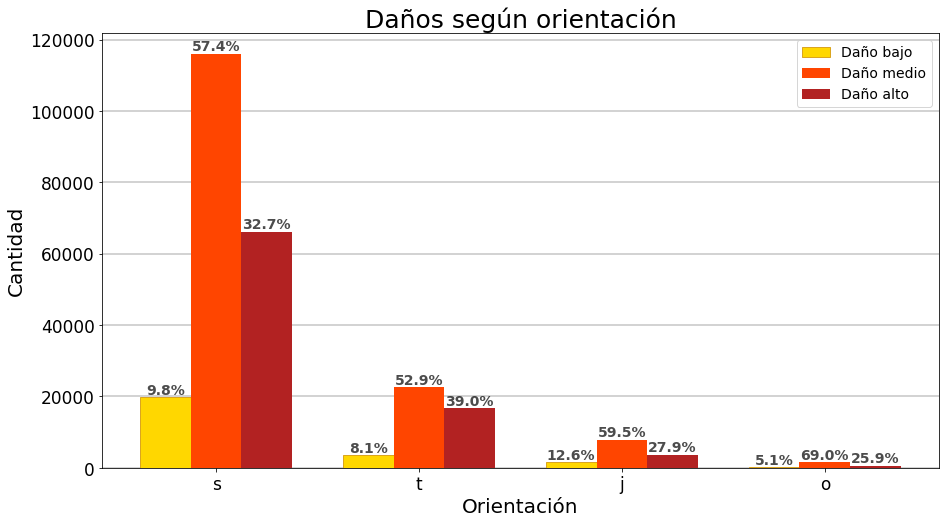

In [ ]:
fig,ax = plt.subplots(figsize=(15,8))
labels = df_dmg_by_posi['position']
x = np.arange(len(labels))
width = 0.25

bar1 = ax.bar(x - width, df_dmg_by_posi['cant_low_dmg'], width,\
              label='Daño bajo', color='gold', edgecolor='goldenrod')
bar2 = ax.bar(x , df_dmg_by_posi['cant_med_dmg'], width,\
              label='Daño medio', color='orangered')
bar3 = ax.bar(x + width, df_dmg_by_posi['cant_hig_dmg'], width,\
              label='Daño alto', color='firebrick')

ax.set_title('Daños según orientación', fontsize=25)
ax.set_ylabel('Cantidad', fontsize=20)
ax.set_xlabel('Orientación', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.legend(fontsize=14)

plt.grid(axis='y', linewidth=2, color='lightgray')
ax.set_axisbelow(True)

# Proporciones
ax.bar_label(bar1, labels=df_dmg_by_posi['p_low'].astype('str')+'%', \
             label_type='edge', color='black', fontsize=14, \
             fontweight='bold', rotation=0, alpha=0.7)
ax.bar_label(bar2, labels=df_dmg_by_posi['p_med'].astype('str')+'%', \
             label_type='edge', color='black', fontsize=14, \
             fontweight='bold', rotation=0, alpha=0.7)
ax.bar_label(bar3, labels=df_dmg_by_posi['p_hig'].astype('str')+'%', \
             label_type='edge', color='black', fontsize=14, \
             fontweight='bold', rotation=0, alpha=0.7)

plt.show()

In [ ]:
# Cantidad de edificaciones con orientación 'o'
for position in df_dmg_by_posi['position']:
  print('Orientación', position, '\tcant total:', \
        int(df_dmg_by_posi.loc[df_dmg_by_posi['position']==position, 'total']))

Orientación s 	cant total: 202090
Orientación t 	cant total: 42896
Orientación j 	cant total: 13282
Orientación o 	cant total: 2333


# Daños según configuración de construcción para diseño sísmico

## Dataframe de datos pertinentes

In [ ]:
df_dmg_by_plan_conf = df\
  .loc[df['damage_grade'] == 1, 'plan_configuration']\
  .value_counts().to_frame().reset_index()\
  .rename(columns={'index':'plan_configuration', \
                   'plan_configuration':'cant_low_dmg'})

df_dmg_by_plan_conf

,plan_configuration,cant_low_dmg
0,d,23310
1,q,781
2,u,774
3,c,86
4,a,66
5,s,53
6,o,40
7,m,8
8,n,6
9,f,0


In [ ]:
df_dmg_by_plan_conf = df_dmg_by_plan_conf\
  .merge(df\
         .loc[df['damage_grade'] == 2, 'plan_configuration']\
         .value_counts().to_frame().reset_index()\
         .rename(columns={'index':'plan_configuration', \
                          'plan_configuration':'cant_med_dmg'}), \
         on = 'plan_configuration', how='left')
  
df_dmg_by_plan_conf

,plan_configuration,cant_low_dmg,cant_med_dmg
0,d,23310,142523
1,q,781,2585
2,u,774,2399
3,c,86,206
4,a,66,157
5,s,53,223
6,o,40,96
7,m,8,34
8,n,6,20
9,f,0,16


In [ ]:
df_dmg_by_plan_conf = df_dmg_by_plan_conf\
  .merge(df\
         .loc[df['damage_grade'] == 3, 'plan_configuration']\
         .value_counts().to_frame().reset_index()\
         .rename(columns={'index':'plan_configuration', \
                          'plan_configuration':'cant_hig_dmg'}), \
         on = 'plan_configuration', how='left')
  
df_dmg_by_plan_conf

,plan_configuration,cant_low_dmg,cant_med_dmg,cant_hig_dmg
0,d,23310,142523,84239
1,q,781,2585,2326
2,u,774,2399,476
3,c,86,206,33
4,a,66,157,29
5,s,53,223,70
6,o,40,96,23
7,m,8,34,4
8,n,6,20,12
9,f,0,16,6


## Se añaden proporciones

In [ ]:
# Suma de casos
df_dmg_by_plan_conf['total'] = df_dmg_by_plan_conf[['cant_low_dmg', 'cant_med_dmg', 'cant_hig_dmg']].sum(axis=1)
# Cálculo de proporciones, en %
df_dmg_by_plan_conf['p_low'] = np.round(df_dmg_by_plan_conf['cant_low_dmg']/df_dmg_by_plan_conf['total']*100, 1)
df_dmg_by_plan_conf['p_med'] = np.round(df_dmg_by_plan_conf['cant_med_dmg']/df_dmg_by_plan_conf['total']*100, 1)
df_dmg_by_plan_conf['p_hig'] = np.round(df_dmg_by_plan_conf['cant_hig_dmg']/df_dmg_by_plan_conf['total']*100, 1)

df_dmg_by_plan_conf

,plan_configuration,cant_low_dmg,cant_med_dmg,cant_hig_dmg,total,p_low,p_med,p_hig
0,d,23310,142523,84239,250072,9.3,57.0,33.7
1,q,781,2585,2326,5692,13.7,45.4,40.9
2,u,774,2399,476,3649,21.2,65.7,13.0
3,c,86,206,33,325,26.5,63.4,10.2
4,a,66,157,29,252,26.2,62.3,11.5
5,s,53,223,70,346,15.3,64.5,20.2
6,o,40,96,23,159,25.2,60.4,14.5
7,m,8,34,4,46,17.4,73.9,8.7
8,n,6,20,12,38,15.8,52.6,31.6
9,f,0,16,6,22,0.0,72.7,27.3


## Dataframe plan_conf = `d`

In [ ]:
df_dmg_by_plan_conf_a = df_dmg_by_plan_conf.loc[df_dmg_by_plan_conf['plan_configuration']=='d']
df_dmg_by_plan_conf_a

,plan_configuration,cant_low_dmg,cant_med_dmg,cant_hig_dmg,total,p_low,p_med,p_hig
0,d,23310,142523,84239,250072,9.3,57.0,33.7


## Plot a

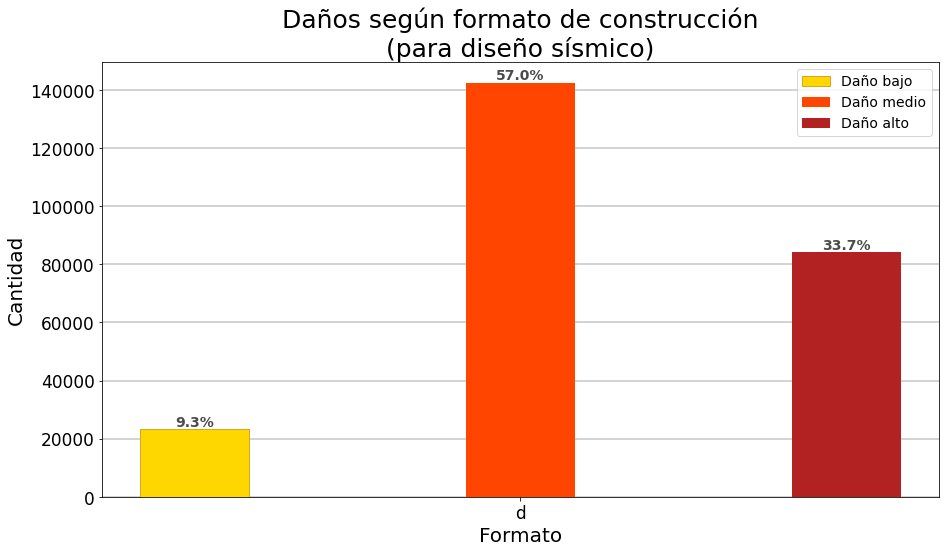

In [ ]:
fig,ax = plt.subplots(figsize=(15,8))
labels = df_dmg_by_plan_conf_a['plan_configuration']
x = np.arange(len(labels))
width = 0.2

bar1 = ax.bar(x - 3*width, df_dmg_by_plan_conf_a['cant_low_dmg'], width,\
              label='Daño bajo', color='gold', edgecolor='goldenrod')
bar2 = ax.bar(x , df_dmg_by_plan_conf_a['cant_med_dmg'], width,\
              label='Daño medio', color='orangered')
bar3 = ax.bar(x + 3*width, df_dmg_by_plan_conf_a['cant_hig_dmg'], width,\
              label='Daño alto', color='firebrick')

title = '''Daños según formato de construcción
(para diseño sísmico)'''
ax.set_title(title, fontsize=25)
ax.set_ylabel('Cantidad', fontsize=20)
ax.set_xlabel('Formato', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.legend(fontsize=14)

plt.grid(axis='y', linewidth=2, color='lightgray')
ax.set_axisbelow(True)

# Proporciones
ax.bar_label(bar1, labels=df_dmg_by_plan_conf_a['p_low'].astype('str')+'%', \
             label_type='edge', color='black', fontsize=14, \
             fontweight='bold', rotation=0, alpha=0.7)
ax.bar_label(bar2, labels=df_dmg_by_plan_conf_a['p_med'].astype('str')+'%', \
             label_type='edge', color='black', fontsize=14, \
             fontweight='bold', rotation=0, alpha=0.7)
ax.bar_label(bar3, labels=df_dmg_by_plan_conf_a['p_hig'].astype('str')+'%', \
             label_type='edge', color='black', fontsize=14, \
             fontweight='bold', rotation=0, alpha=0.7)

plt.show()

El formato `d` tiene mucho peso comparado con los demás.

## Dataframe con formatos de construcción `q, u`

In [ ]:
df_dmg_by_plan_conf_b = df_dmg_by_plan_conf.loc[(df_dmg_by_plan_conf['plan_configuration'] == 'q') | \
                                                    (df_dmg_by_plan_conf['plan_configuration'] == 'u')]
df_dmg_by_plan_conf_b

,plan_configuration,cant_low_dmg,cant_med_dmg,cant_hig_dmg,total,p_low,p_med,p_hig
1,q,781,2585,2326,5692,13.7,45.4,40.9
2,u,774,2399,476,3649,21.2,65.7,13.0


## Plot b

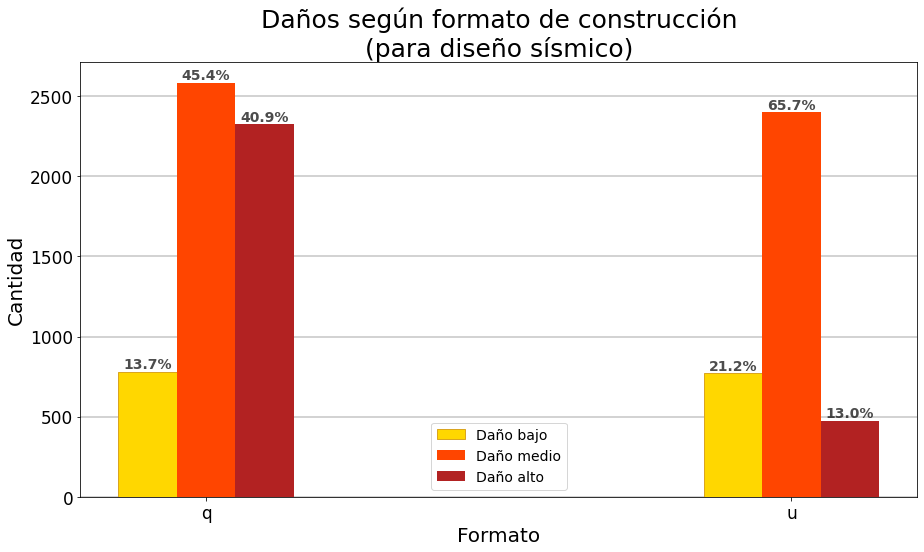

In [ ]:
fig,ax = plt.subplots(figsize=(15,8))
labels = df_dmg_by_plan_conf_b['plan_configuration']
x = np.arange(len(labels))
width = 0.1

bar1 = ax.bar(x - width, df_dmg_by_plan_conf_b['cant_low_dmg'], width,\
              label='Daño bajo', color='gold', edgecolor='goldenrod')
bar2 = ax.bar(x , df_dmg_by_plan_conf_b['cant_med_dmg'], width,\
              label='Daño medio', color='orangered')
bar3 = ax.bar(x + width, df_dmg_by_plan_conf_b['cant_hig_dmg'], width,\
              label='Daño alto', color='firebrick')

title = '''Daños según formato de construcción
(para diseño sísmico)'''
ax.set_title(title, fontsize=25)
ax.set_ylabel('Cantidad', fontsize=20)
ax.set_xlabel('Formato', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.legend(fontsize=14)

plt.grid(axis='y', linewidth=2, color='lightgray')
ax.set_axisbelow(True)

# Proporciones
ax.bar_label(bar1, labels=df_dmg_by_plan_conf_b['p_low'].astype('str')+'%', \
             label_type='edge', color='black', fontsize=14, \
             fontweight='bold', rotation=0, alpha=0.7)
ax.bar_label(bar2, labels=df_dmg_by_plan_conf_b['p_med'].astype('str')+'%', \
             label_type='edge', color='black', fontsize=14, \
             fontweight='bold', rotation=0, alpha=0.7)
ax.bar_label(bar3, labels=df_dmg_by_plan_conf_b['p_hig'].astype('str')+'%', \
             label_type='edge', color='black', fontsize=14, \
             fontweight='bold', rotation=0, alpha=0.7)

plt.show()

## Dataframe sin formato de construcción `d, q, u`

In [ ]:
df_dmg_by_plan_conf_c = df_dmg_by_plan_conf.drop([0, 1, 2])
df_dmg_by_plan_conf_c

,plan_configuration,cant_low_dmg,cant_med_dmg,cant_hig_dmg,total,p_low,p_med,p_hig
3,c,86,206,33,325,26.5,63.4,10.2
4,a,66,157,29,252,26.2,62.3,11.5
5,s,53,223,70,346,15.3,64.5,20.2
6,o,40,96,23,159,25.2,60.4,14.5
7,m,8,34,4,46,17.4,73.9,8.7
8,n,6,20,12,38,15.8,52.6,31.6
9,f,0,16,6,22,0.0,72.7,27.3


## Plot c

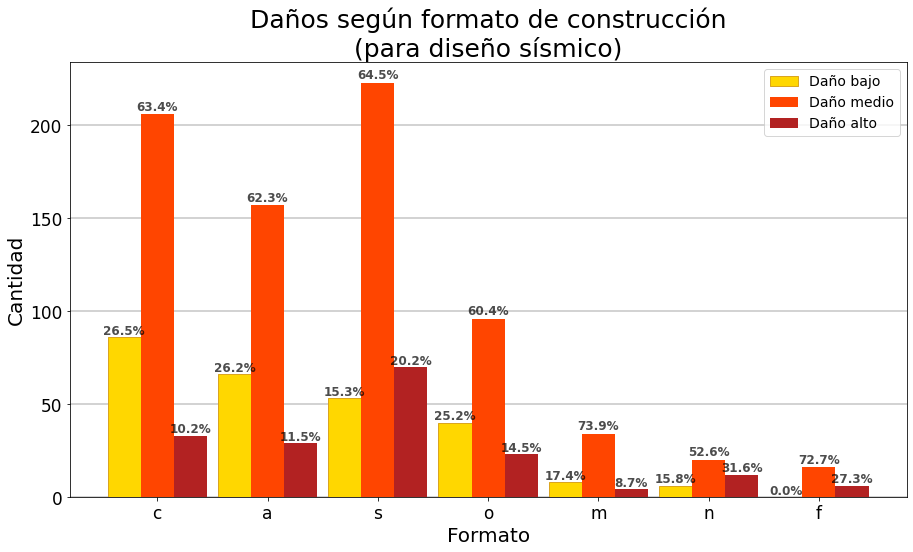

In [ ]:
fig,ax = plt.subplots(figsize=(15,8))
labels = df_dmg_by_plan_conf_c['plan_configuration']
x = np.arange(len(labels))
width = 0.3

bar1 = ax.bar(x - width, df_dmg_by_plan_conf_c['cant_low_dmg'], width,\
              label='Daño bajo', color='gold', edgecolor='goldenrod')
bar2 = ax.bar(x , df_dmg_by_plan_conf_c['cant_med_dmg'], width,\
              label='Daño medio', color='orangered')
bar3 = ax.bar(x + width, df_dmg_by_plan_conf_c['cant_hig_dmg'], width,\
              label='Daño alto', color='firebrick')

title = '''Daños según formato de construcción
(para diseño sísmico)'''
ax.set_title(title, fontsize=25)
ax.set_ylabel('Cantidad', fontsize=20)
ax.set_xlabel('Formato', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.legend(fontsize=14)

plt.grid(axis='y', linewidth=2, color='lightgray')
ax.set_axisbelow(True)

# Proporciones
ax.bar_label(bar1, labels=df_dmg_by_plan_conf_c['p_low'].astype('str')+'%', \
             label_type='edge', color='black', fontsize=12, \
             fontweight='bold', rotation=0, alpha=0.7)
ax.bar_label(bar2, labels=df_dmg_by_plan_conf_c['p_med'].astype('str')+'%', \
             label_type='edge', color='black', fontsize=12, padding=1, \
             fontweight='bold', rotation=0, alpha=0.7)
ax.bar_label(bar3, labels=df_dmg_by_plan_conf_c['p_hig'].astype('str')+'%', \
             label_type='edge', color='black', fontsize=12, \
             fontweight='bold', rotation=0, alpha=0.7)

plt.show()

# Análisis de edificaciones con uso secundario

## Verificación de datos para usos secundarios

Se verifica que las edificaciones que tienen segundo uso lo identifiquen.

In [22]:
# Se verifica que las edificaciones que tienen segundo uso lo identifiquen
df\
  .loc[df['has_secondary_use'] == 1, 'has_secondary_use':'has_secondary_use_other']\
  .sum(axis=1).value_counts()

2    28599
3      557
dtype: int64

Como no hay ninguno con 1 todas las edificaciones con uso secundario identifican al menos uno de esos usos.

A continuación se verifica que las edificaciones que no acusan uso secundario no tengan identificaciones de alguno.

In [23]:
df\
  .loc[df['has_secondary_use'] == 0, 'has_secondary_use':'has_secondary_use_other']\
  .sum(axis=1).value_counts()

0    231445
dtype: int64

Todas las edificaciones suman cero. Los datos son coherentes.

## Dataframe para usos secundarios

In [24]:
columnas = ['has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
       'has_secondary_use_health_post', 'has_secondary_use_gov_office',
       'has_secondary_use_use_police', 'has_secondary_use_other',
       'damage_grade']

df_secondary = df[columnas]

# Conteo entre edificios con y sin usos secundarios

In [ ]:
v_usos = df_use['has_secondary_use'].value_counts()
v_usos

False    231445
True      29156
Name: has_secondary_use, dtype: int64

## Plot

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """


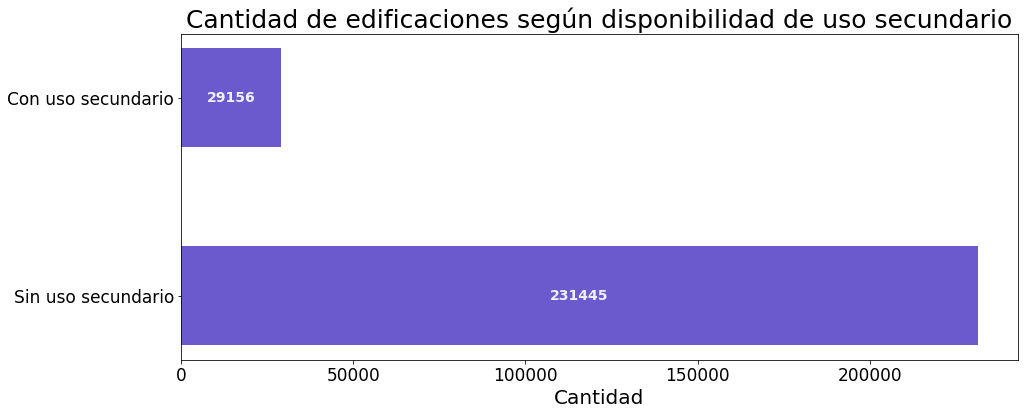

In [ ]:
fig, ax=plt.subplots(figsize=(15,6))
labels = ['Sin uso secundario', 'Con uso secundario']
x = np.arange(len(labels))
plot = ax.barh(y=labels, width=v_usos, height=0.5, color='slateblue')
ax.set_yticklabels(labels, fontsize=17)

plt.title('Cantidad de edificaciones según disponibilidad de uso secundario', fontsize=25)
plt.xlabel('Cantidad', fontsize=20)
plt.xticks(fontsize=17)

# Cantidades
ax.bar_label(plot, labels=v_usos.values, padding=0, \
             label_type='center', color='white', fontsize=14, \
             fontweight='bold', rotation=0, alpha=0.9)

plt.show()

# Daños entre edificaciones con o sin uso secundario

In [ ]:
df_use = df.loc[:, ['has_secondary_use', 'damage_grade']].copy()
df_use.sample(3, random_state=33)

,has_secondary_use,damage_grade
146173,False,3
253461,False,3
81684,True,1


In [ ]:
df_use_by_dmg = df_use\
  .groupby(['damage_grade', 'has_secondary_use'])\
  .agg({'has_secondary_use':'count'})\
  .rename(columns={'has_secondary_use':'count'})\
  .reset_index()

df_use_by_dmg = df_use_by_dmg.\
  pivot(index='damage_grade', columns='has_secondary_use', values='count')\

df_use_by_dmg\
  .rename(columns={False:'one_use', True:'other_use'}, inplace=True)

df_use_by_dmg.columns.name = None

df_use_by_dmg

,one_use,other_use
damage_grade,,
1,20876,4248
2,130544,17715
3,80025,7193


In [ ]:
# Se agregan proporciones
df_use_by_dmg['prop_one_use'] = df_use_by_dmg['one_use']/df_use_by_dmg['one_use'].sum()*100
df_use_by_dmg['prop_other_use'] = df_use_by_dmg['other_use']/df_use_by_dmg['other_use'].sum()*100

df_use_by_dmg

,one_use,other_use,prop_one_use,prop_other_use
damage_grade,,,,
1,20876,4248,9.019854,14.569900
2,130544,17715,56.403897,60.759363
3,80025,7193,34.576249,24.670737


In [ ]:
df_prop = df_use_by_dmg.T.reset_index().drop([0,1])\
  .rename(columns={'index':'type', 1:'Bajo', 2:'Medio', 3:'Alto'})\
  .replace({'prop_one_use':'Sin uso secundario', 'prop_other_use':'Con uso secundario'})
df_prop

damage_grade,type,Bajo,Medio,Alto
2,Sin uso secundario,9.019854,56.403897,34.576249
3,Con uso secundario,14.569900,60.759363,24.670737


## Plot

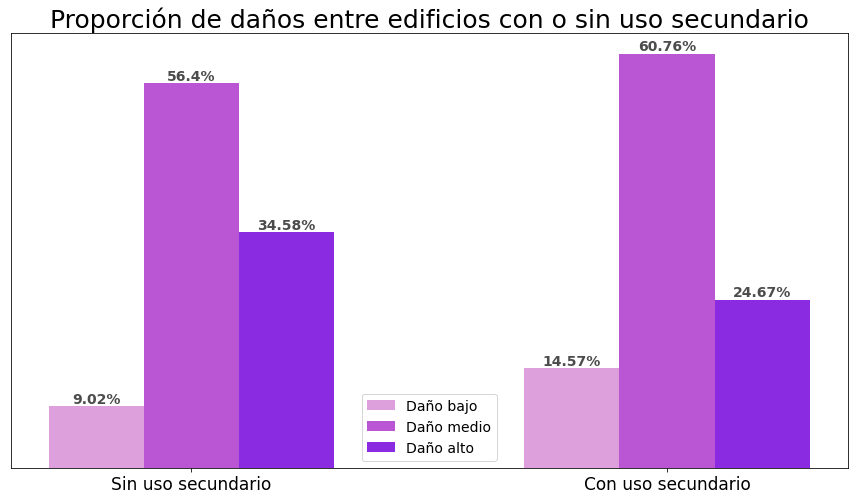

In [ ]:
fig,ax = plt.subplots(figsize=(15,8))
labels = df_prop['type']
x = np.arange(len(labels))
width = 0.2

bar1 = ax.bar(x - width, df_prop['Bajo'], width,\
              label='Daño bajo', color='plum')
bar2 = ax.bar(x , df_prop['Medio'], width,\
              label='Daño medio', color='mediumorchid')
bar3 = ax.bar(x + width, df_prop['Alto'], width,\
              label='Daño alto', color='blueviolet')

ax.set_title('Proporción de daños entre edificios con o sin uso secundario', fontsize=25)
ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.xticks(fontsize=17)
plt.yticks([], fontsize=17)
plt.legend(fontsize=14)

plt.grid(axis='y', linewidth=2, color='lightgray')
ax.set_axisbelow(True)

# Proporciones
ax.bar_label(bar1, labels=np.round(df_prop['Bajo'], 2).astype('str')+'%', \
             label_type='edge', color='black', fontsize=14, \
             fontweight='bold', rotation=0, alpha=0.7)
ax.bar_label(bar2, labels=np.round(df_prop['Medio'], 2).astype('str')+'%', \
             label_type='edge', color='black', fontsize=14, \
             fontweight='bold', rotation=0, alpha=0.7)
ax.bar_label(bar3, labels=np.round(df_prop['Alto'], 2).astype('str')+'%', \
             label_type='edge', color='black', fontsize=14, \
             fontweight='bold', rotation=0, alpha=0.7)

plt.show()

# Cantidad de edificaciones con usos secundarios


In [ ]:
# No es necesaria la columna de daños
cantidades = df_secondary\
  .loc[:, df_secondary.columns != 'damage_grade']\
  .sum(axis=0).sort_values(ascending=True)

cantidades

has_secondary_use_use_police        23
has_secondary_use_gov_office        38
has_secondary_use_health_post       49
has_secondary_use_school            94
has_secondary_use_institution      245
has_secondary_use_industry         279
has_secondary_use_other           1334
has_secondary_use_rental          2111
has_secondary_use_hotel           8763
has_secondary_use_agriculture    16777
dtype: int64

In [ ]:
# Cambio de nombres para el índice
cantidades.index = ['est. policial', 'of. govierno', 'posta sanitaria', \
                    'escuela', 'institución', 'industria', 'otro', 'alquiler', \
                    'hotel', 'agricultura']
cantidades

est. policial         23
of. govierno          38
posta sanitaria       49
escuela               94
institución          245
industria            279
otro                1334
alquiler            2111
hotel               8763
agricultura        16777
dtype: int64

## Plot

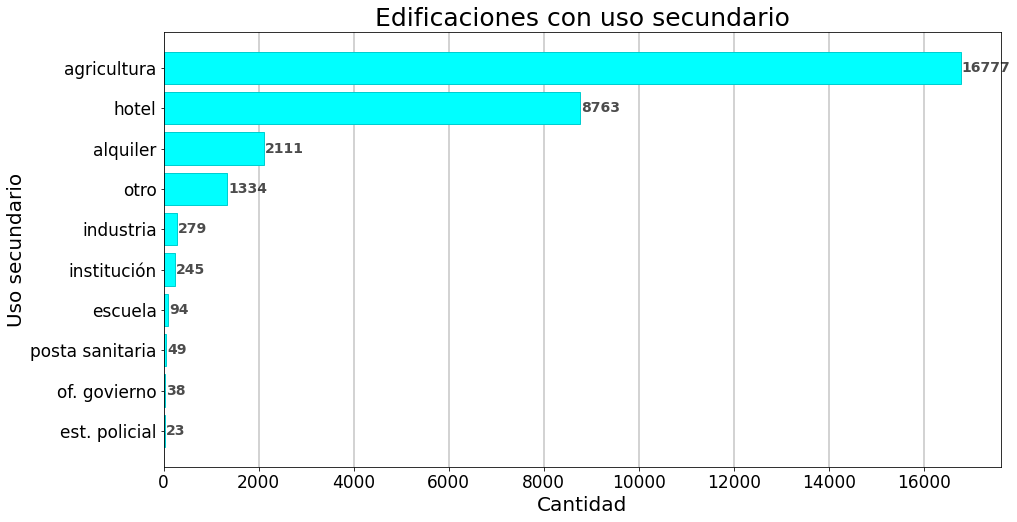

In [ ]:
fig,ax = plt.subplots(figsize=(15,8))

x = np.arange(len(cantidades))
width = 0.8

plot = ax.barh(x, cantidades.values, width, color='aqua', edgecolor='darkturquoise')

ax.set_title('Edificaciones con uso secundario', fontsize=25)
ax.set_xlabel('Cantidad', fontsize=20)
ax.set_ylabel('Uso secundario', fontsize=20)
ax.set_yticks(x)
ax.set_yticklabels(cantidades.index)

plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

plt.grid(axis='x', linewidth=2, color='lightgray')
ax.set_axisbelow(True)

# Cantidades
ax.bar_label(plot, labels=cantidades.values, padding=1, \
             label_type='edge', color='black', fontsize=14, \
             fontweight='bold', rotation=0, alpha=0.7)

plt.show()

# Daños para edificaciones con usos secundarios

In [25]:
# Se arma Datafrae de daños para edificaciones con usos secundarios
df_dmg_by_sec_use = df_secondary\
  .loc[: , ['has_secondary_use_agriculture', 'damage_grade']]\
  .groupby('damage_grade').agg({'has_secondary_use_agriculture':'sum'})\
  .rename(columns={'has_secondary_use_agriculture':'agricultura'})

df_dmg_by_sec_use = df_dmg_by_sec_use\
  .merge(df_secondary\
         .loc[: , ['has_secondary_use_hotel', 'damage_grade']]\
         .groupby('damage_grade').agg({'has_secondary_use_hotel':'sum'})\
         .rename(columns={'has_secondary_use_hotel':'hotel'}), \
         on='damage_grade', how='left')

df_dmg_by_sec_use = df_dmg_by_sec_use\
  .merge(df_secondary\
         .loc[: , ['has_secondary_use_rental', 'damage_grade']]\
         .groupby('damage_grade').agg({'has_secondary_use_rental':'sum'})\
         .rename(columns={'has_secondary_use_rental':'alquiler'}), \
         on='damage_grade', how='left')

df_dmg_by_sec_use = df_dmg_by_sec_use\
  .merge(df_secondary\
         .loc[: , ['has_secondary_use_institution', 'damage_grade']]\
         .groupby('damage_grade').agg({'has_secondary_use_institution':'sum'})\
         .rename(columns={'has_secondary_use_institution':'institución'}), \
         on='damage_grade', how='left')

df_dmg_by_sec_use = df_dmg_by_sec_use\
  .merge(df_secondary\
         .loc[: , ['has_secondary_use_school', 'damage_grade']]\
         .groupby('damage_grade').agg({'has_secondary_use_school':'sum'})\
         .rename(columns={'has_secondary_use_school':'escuela'}), \
         on='damage_grade', how='left')

df_dmg_by_sec_use = df_dmg_by_sec_use\
  .merge(df_secondary\
         .loc[: , ['has_secondary_use_industry', 'damage_grade']]\
         .groupby('damage_grade').agg({'has_secondary_use_industry':'sum'})\
         .rename(columns={'has_secondary_use_industry':'industria'}), \
         on='damage_grade', how='left')

df_dmg_by_sec_use = df_dmg_by_sec_use\
  .merge(df_secondary\
         .loc[: , ['has_secondary_use_health_post', 'damage_grade']]\
         .groupby('damage_grade').agg({'has_secondary_use_health_post':'sum'})\
         .rename(columns={'has_secondary_use_health_post':'posta sanitaria'}), \
         on='damage_grade', how='left')

df_dmg_by_sec_use = df_dmg_by_sec_use\
  .merge(df_secondary\
         .loc[: , ['has_secondary_use_gov_office', 'damage_grade']]\
         .groupby('damage_grade').agg({'has_secondary_use_gov_office':'sum'})\
         .rename(columns={'has_secondary_use_gov_office':'oficina gubernamental'}), \
         on='damage_grade', how='left')

df_dmg_by_sec_use = df_dmg_by_sec_use\
  .merge(df_secondary\
         .loc[: , ['has_secondary_use_use_police', 'damage_grade']]\
         .groupby('damage_grade').agg({'has_secondary_use_use_police':'sum'})\
         .rename(columns={'has_secondary_use_use_police':'estación de policía'}), \
         on='damage_grade', how='left')

df_dmg_by_sec_use = df_dmg_by_sec_use\
  .merge(df_secondary\
         .loc[: , ['has_secondary_use_other', 'damage_grade']]\
         .groupby('damage_grade').agg({'has_secondary_use_other':'sum'})\
         .rename(columns={'has_secondary_use_other':'otro'}), \
         on='damage_grade', how='left')
  
# Se traspone el Dataframe
df_dmg_by_sec_use = df_dmg_by_sec_use.T.reset_index()\
  .rename(columns={'index':'type', 1:'cant_low_dmg', 2:'cant_med_dmg', 3:'cant_hig_dmg'})\

df_dmg_by_sec_use.index.name = None

df_dmg_by_sec_use

damage_grade,type,cant_low_dmg,cant_med_dmg,cant_hig_dmg
0,agricultura,829,10679,5269
1,hotel,2216,5058,1489
2,alquiler,877,1051,183
3,institución,99,129,17
4,escuela,30,47,17
5,industria,59,152,68
6,posta sanitaria,12,32,5
7,oficina gubernamental,13,21,4
8,estación de policía,4,12,7
9,otro,175,852,307


In [26]:
# Se agregan proporciones
# Suma de casos
df_dmg_by_sec_use['total'] = df_dmg_by_sec_use[['cant_low_dmg', 'cant_med_dmg', 'cant_hig_dmg']].sum(axis=1)
# Cálculo de proporciones, en %
df_dmg_by_sec_use['p_low'] = np.round(df_dmg_by_sec_use['cant_low_dmg']/df_dmg_by_sec_use['total']*100, 1)
df_dmg_by_sec_use['p_med'] = np.round(df_dmg_by_sec_use['cant_med_dmg']/df_dmg_by_sec_use['total']*100, 1)
df_dmg_by_sec_use['p_hig'] = np.round(df_dmg_by_sec_use['cant_hig_dmg']/df_dmg_by_sec_use['total']*100, 1)

df_dmg_by_sec_use

damage_grade,type,cant_low_dmg,cant_med_dmg,cant_hig_dmg,total,p_low,p_med,p_hig
0,agricultura,829,10679,5269,16777,4.9,63.7,31.4
1,hotel,2216,5058,1489,8763,25.3,57.7,17.0
2,alquiler,877,1051,183,2111,41.5,49.8,8.7
3,institución,99,129,17,245,40.4,52.7,6.9
4,escuela,30,47,17,94,31.9,50.0,18.1
5,industria,59,152,68,279,21.1,54.5,24.4
6,posta sanitaria,12,32,5,49,24.5,65.3,10.2
7,oficina gubernamental,13,21,4,38,34.2,55.3,10.5
8,estación de policía,4,12,7,23,17.4,52.2,30.4
9,otro,175,852,307,1334,13.1,63.9,23.0


## Los cuatro usos secundarios más ocurrentes

In [27]:
df_dmg_by_sec_use_a = df_dmg_by_sec_use.drop([3,4,5,6,7,8]).copy()
df_dmg_by_sec_use_a

damage_grade,type,cant_low_dmg,cant_med_dmg,cant_hig_dmg,total,p_low,p_med,p_hig
0,agricultura,829,10679,5269,16777,4.9,63.7,31.4
1,hotel,2216,5058,1489,8763,25.3,57.7,17.0
2,alquiler,877,1051,183,2111,41.5,49.8,8.7
9,otro,175,852,307,1334,13.1,63.9,23.0


## Plot a

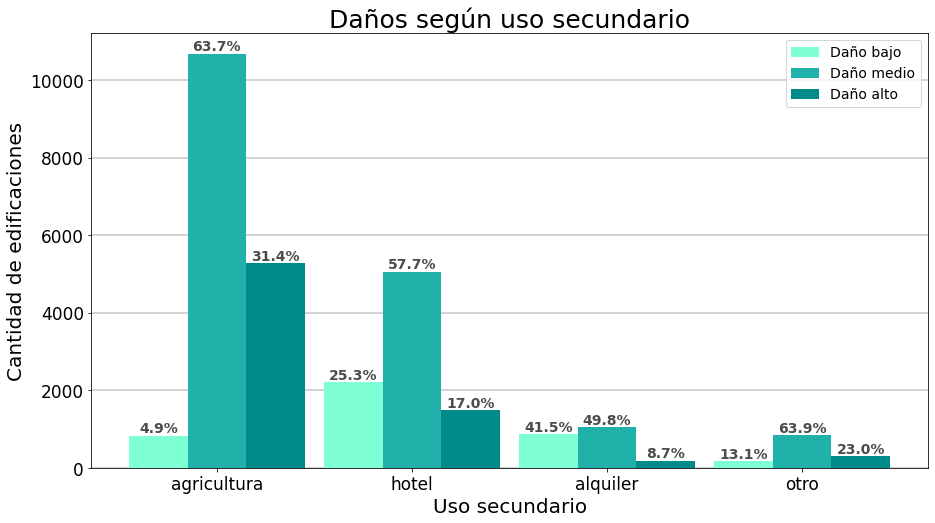

In [28]:
fig,ax = plt.subplots(figsize=(15,8))
labels = df_dmg_by_sec_use_a['type']
x = np.arange(len(labels))
width = 0.3

bar1 = ax.bar(x - width, df_dmg_by_sec_use_a['cant_low_dmg'], width,\
              label='Daño bajo', color='aquamarine')
bar2 = ax.bar(x , df_dmg_by_sec_use_a['cant_med_dmg'], width,\
              label='Daño medio', color='lightseagreen')
bar3 = ax.bar(x + width, df_dmg_by_sec_use_a['cant_hig_dmg'], width,\
              label='Daño alto', color='darkcyan')

ax.set_title('Daños según uso secundario', fontsize=25)
ax.set_ylabel('Cantidad de edificaciones', fontsize=20)
ax.set_xlabel('Uso secundario', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.legend(fontsize=14)

plt.grid(axis='y', linewidth=2, color='lightgray')
ax.set_axisbelow(True)

# Proporciones
ax.bar_label(bar1, labels=df_dmg_by_sec_use_a['p_low'].astype('str')+'%', \
             label_type='edge', color='black', fontsize=14, \
             fontweight='bold', rotation=0, alpha=0.7)
ax.bar_label(bar2, labels=df_dmg_by_sec_use_a['p_med'].astype('str')+'%', \
             label_type='edge', color='black', fontsize=14, \
             fontweight='bold', rotation=0, alpha=0.7)
ax.bar_label(bar3, labels=df_dmg_by_sec_use_a['p_hig'].astype('str')+'%', \
             label_type='edge', color='black', fontsize=14, \
             fontweight='bold', rotation=0, alpha=0.7)

plt.show()

## Resto de los usos secundarios

In [29]:
df_dmg_by_sec_use_b = df_dmg_by_sec_use.drop([0,1,2,9]).copy()
df_dmg_by_sec_use_b

damage_grade,type,cant_low_dmg,cant_med_dmg,cant_hig_dmg,total,p_low,p_med,p_hig
3,institución,99,129,17,245,40.4,52.7,6.9
4,escuela,30,47,17,94,31.9,50.0,18.1
5,industria,59,152,68,279,21.1,54.5,24.4
6,posta sanitaria,12,32,5,49,24.5,65.3,10.2
7,oficina gubernamental,13,21,4,38,34.2,55.3,10.5
8,estación de policía,4,12,7,23,17.4,52.2,30.4


## Plot b

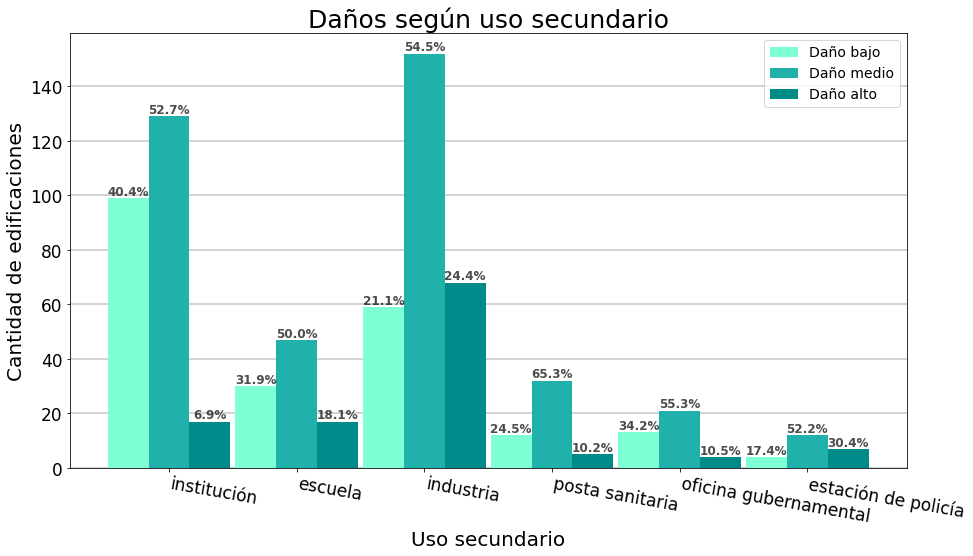

In [30]:
fig,ax = plt.subplots(figsize=(15,8))
labels = df_dmg_by_sec_use_b['type']
x = np.arange(len(labels))
width = 0.32

bar1 = ax.bar(x - width, df_dmg_by_sec_use_b['cant_low_dmg'], width,\
              label='Daño bajo', color='aquamarine')
bar2 = ax.bar(x , df_dmg_by_sec_use_b['cant_med_dmg'], width,\
              label='Daño medio', color='lightseagreen')
bar3 = ax.bar(x + width, df_dmg_by_sec_use_b['cant_hig_dmg'], width,\
              label='Daño alto', color='darkcyan')

ax.set_title('Daños según uso secundario', fontsize=25)
ax.set_ylabel('Cantidad de edificaciones', fontsize=20)
ax.set_xlabel('Uso secundario', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.xticks(fontsize=17, rotation=-10, ha='left')
plt.yticks(fontsize=17)
plt.legend(fontsize=14)

plt.grid(axis='y', linewidth=2, color='lightgray')
ax.set_axisbelow(True)

# Proporciones
ax.bar_label(bar1, labels=df_dmg_by_sec_use_b['p_low'].astype('str')+'%', \
             label_type='edge', color='black', fontsize=12, \
             fontweight='bold', rotation=0, alpha=0.7)
ax.bar_label(bar2, labels=df_dmg_by_sec_use_b['p_med'].astype('str')+'%', \
             label_type='edge', color='black', fontsize=12, padding=0, \
             fontweight='bold', rotation=0, alpha=0.7)
ax.bar_label(bar3, labels=df_dmg_by_sec_use_b['p_hig'].astype('str')+'%', \
             label_type='edge', color='black', fontsize=12, \
             fontweight='bold', rotation=0, alpha=0.7)

plt.show()